# 1. Gradient Descent
## 1-1. One-Dimensional

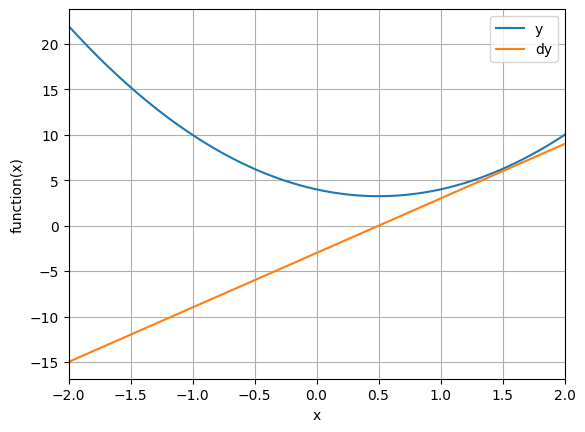

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Sample function
def function(x):
  return 3 * x ** 2 - 3 * x + 4

# Derivative function
def derivative_of_function(x):
  return 6 * x - 3

# Define a range for `x`
x = np.linspace(-2, 2, 2001)

# Plot the function and its derivative
plt.plot(x, function(x), x, derivative_of_function(x))
plt.xlim(x[[0, -1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('function(x)')
plt.legend(['y', 'dy'])
plt.show()

In [2]:
# Random starting point
np.random.seed(0)
local_min = np.random.choice(x, 1)
print("Random Starting Point:", local_min)

# Learning parameters
learning_rate = 0.01
training_epochs = 100

# Run through training
for i in range(training_epochs):
    grad = derivative_of_function(local_min)
    local_min = local_min - learning_rate * grad

print("Final Local Minimum:", local_min)

Random Starting Point: [-0.632]
Final Local Minimum: [0.49767388]


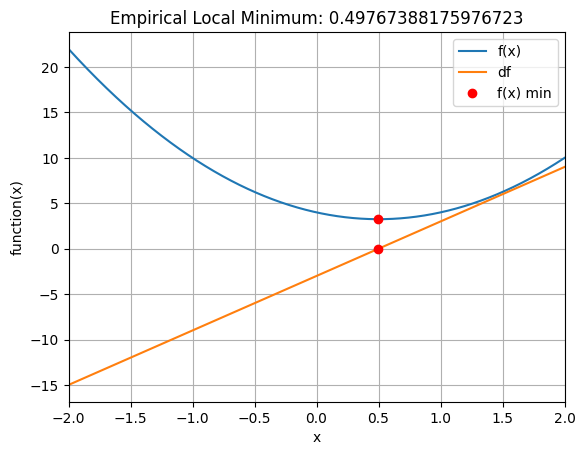

In [3]:
# Plot the results
plt.plot(x, function(x), x, derivative_of_function(x))
plt.plot(local_min, derivative_of_function(local_min), 'ro')
plt.plot(local_min, function(local_min), 'ro')

plt.xlim(x[[0, -1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('function(x)')
plt.legend(['f(x)', 'df', 'f(x) min'])
plt.title('Empirical Local Minimum: %s' % local_min[0])
plt.show()

/tmp/ipykernel_10859/1324670382.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  model_params[i, 0] = local_min
/tmp/ipykernel_10859/1324670382.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  model_params[i, 1] = grad


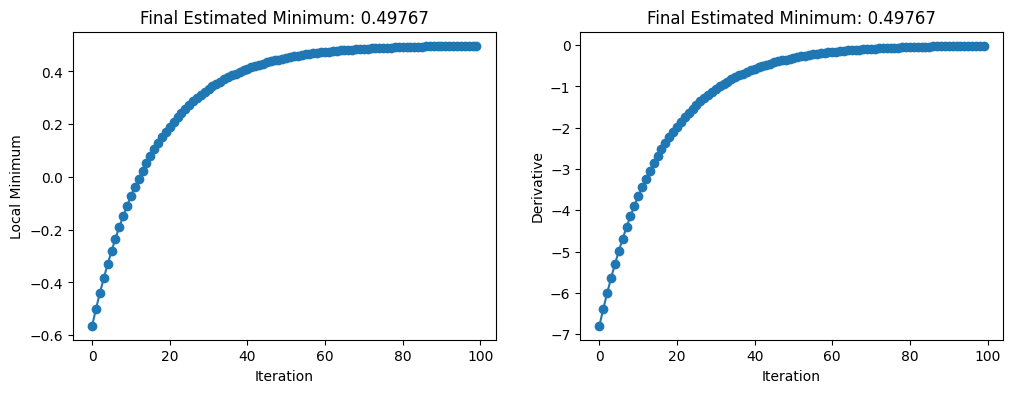

In [7]:
# Random starting point
np.random.seed(0)
local_min = np.random.choice(x, 1)

# Learning parameters
learning_rate = 0.01
training_epochs = 100

# Run through training and store all the results
model_params = np.zeros((training_epochs, 2))
for i in range(training_epochs):
    grad = derivative_of_function(local_min)
    local_min = local_min - learning_rate * grad
    model_params[i, 0] = local_min
    model_params[i, 1] = grad

# Plot the gradient over iterations
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

for i in range(2):
    ax[i].plot(model_params[:, i], 'o-')
    ax[i].set_xlabel('Iteration')
    ax[i].set_title(f'Final Estimated Minimum: {local_min[0]:.5f}')

ax[0].set_ylabel('Local Minimum')
ax[1].set_ylabel('Derivative')

plt.show()

## 1-2. Two-Dimensional

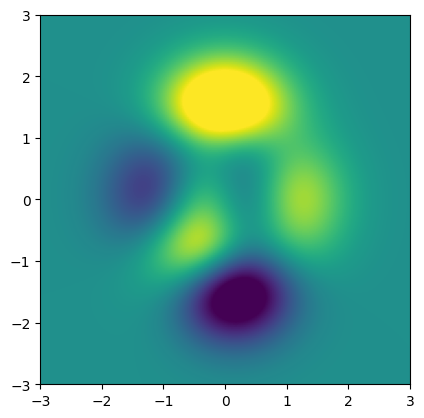

In [9]:
# Sample function
def peaks(x, y):
    # Expand to a 2-Dimensional mesh
    x, y = np.meshgrid(x, y)
    z = 3 * (1 - x) ** 2 * np.exp(-(x ** 2) - (y + 1) ** 2) - 10 * (x / 5 - x ** 3 - y ** 5) * np.exp(-x ** 2 - y ** 2) - 1 / 3 * np.exp(-(x + 1) ** 2 - y ** 2)
    return z

# Create the landscape
x = np.linspace(-3, 3, 201)
y = np.linspace(-3, 3, 201)
z = peaks(x, y)

# Plot
plt.imshow(z, extent=[x[0], x[-1], y[0], y[-1]], vmin=-5, vmax=5, origin='lower')
plt.show()

In [10]:
import sympy as sym

# Create derivative functions using `sympy`
sx, sy = sym.symbols('sx, sy')
sz = 3 * (1 - sx) ** 2 * sym.exp(-(sx ** 2) - (sy + 1) ** 2) - 10 * (sx/5 - sx ** 3 - sy ** 5) * sym.exp(-sx ** 2 - sy ** 2) - 1 / 3 * sym.exp(-(sx + 1) ** 2 - sy ** 2)

# Create functions from the sympy-computed derivatives
df_x = sym.lambdify((sx, sy), sym.diff(sz, sx), 'sympy')
df_y = sym.lambdify((sx, sy), sym.diff(sz, sy), 'sympy')
df_x(1, 1).evalf()

-1.07369833656079

In [12]:
# Random starting point (uniform between `-2` and `2`)
np.random.seed(0)
local_min = np.random.rand(2) * 4 - 2
# Make a copy
start_point = local_min[:]

# Learning parameters
learning_rate = 0.01
training_epochs = 1000

# Run through training
trajectory = np.zeros((training_epochs, 2))
for i in range(training_epochs):
    grad = np.array([df_x(local_min[0], local_min[1]).evalf(), df_y(local_min[0], local_min[1]).evalf()])
    local_min = local_min - learning_rate * grad
    trajectory[i, :] = local_min

print("Random Starting Point:", start_point)
print("Final Local Minimum:", local_min)

Random Starting Point: [0.19525402 0.86075747]
Final Local Minimum: [0.296445553846832 0.320196247666835]


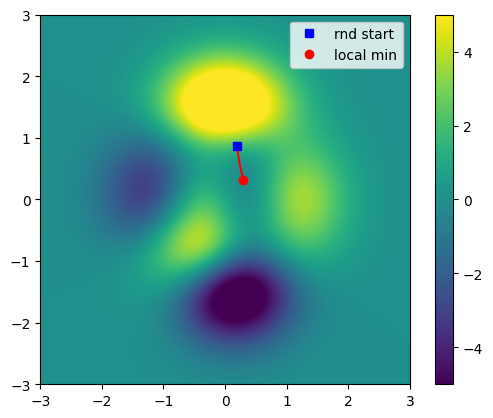

In [13]:
# Plot the trajectory
plt.imshow(z, extent=[x[0], x[-1], y[0], y[-1]], vmin=-5, vmax=5, origin='lower')
plt.plot(start_point[0], start_point[1], 'bs')
plt.plot(local_min[0], local_min[1], 'ro')
plt.plot(trajectory[:, 0], trajectory[:, 1], 'r')
plt.legend(['rnd start','local min'])
plt.colorbar()
plt.show()

## 1-3. Learning Rate
Perform parametric experiments for deeper understanding by varying the following hyperparameters:
- Weight initialization
- Learning rate
- Learning rate and training epochs

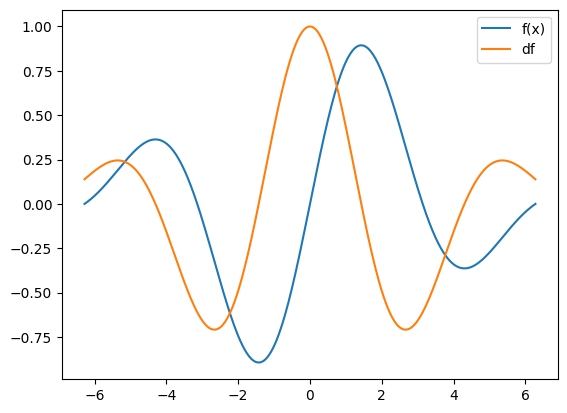

In [14]:
# Sample function
x  = np.linspace(-2 * np.pi, 2 * np.pi, 401)
fx = np.sin(x) * np.exp(-x ** 2 * 0.05)

# Derivative of the function
df = np.cos(x) * np.exp(-x ** 2 * 0.05) + np.sin(x) * (-0.1 * x) * np.exp(-x ** 2 * 0.05) 

# Quick plot for inspection
plt.plot(x, fx, x, df)
plt.legend(['f(x)', 'df']);

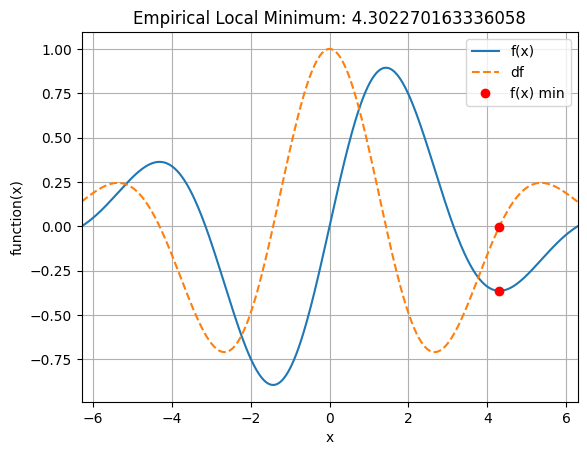

In [15]:
# Sample function
def function(x):
  return np.sin(x) * np.exp(-x ** 2 * 0.05)

# Derivative of the function
def derivative_of_function(x):
  return np.cos(x) * np.exp(-x ** 2 * 0.05) - np.sin(x) * 0.1 * x * np.exp(-x ** 2 * 0.05)

# Random starting point
local_min = np.random.choice(x, 1)

# Learning parameters
learning_rate = 0.01
training_epochs = 1000

# Run through training
for i in range(training_epochs):
    grad = derivative_of_function(local_min)
    local_min = local_min - learning_rate * grad

# Plot the results
plt.plot(x, function(x), x, derivative_of_function(x), '--')
plt.plot(local_min, derivative_of_function(local_min), 'ro')
plt.plot(local_min, function(local_min), 'ro')

plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('function(x)')
plt.legend(['f(x)', 'df', 'f(x) min'])
plt.title('Empirical Local Minimum: %s' % local_min[0])
plt.show()

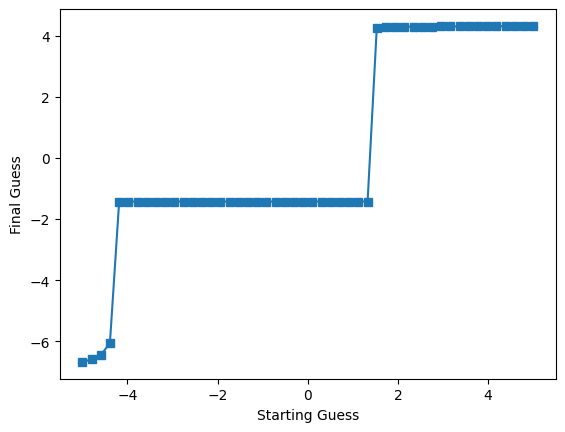

In [16]:
# [1] Systematically varying the starting locations
start_locations = np.linspace(-5, 5, 50)
final_results = np.zeros(len(start_locations))

# Loop over starting points
for idx, local_min in enumerate(start_locations):
    # Run through training
    for i in range(training_epochs):
        grad = derivative_of_function(local_min)
        local_min = local_min - learning_rate * grad
  
    # Store the final guess
    final_results[idx] = local_min

# Plot the results
plt.plot(start_locations, final_results, 's-')
plt.xlabel('Starting Guess')
plt.ylabel('Final Guess')
plt.show()

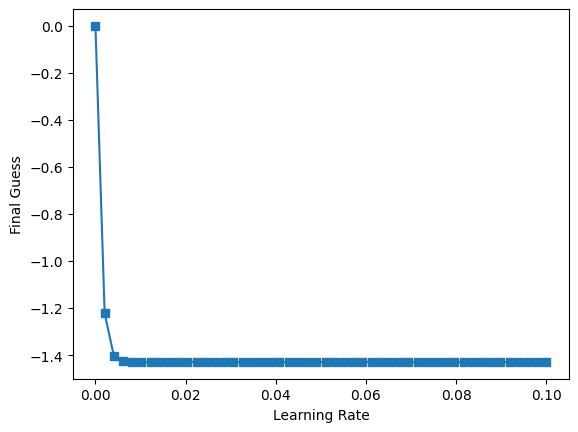

In [17]:
# [2] Systematically varying the learning rate
learning_rates = np.linspace(1e-10, 1e-1, 50)
final_results = np.zeros(len(learning_rates))

# Loop over learning rates
for idx, learning_rate in enumerate(learning_rates):
    # Force starting guess to `0`
    local_min = 0

    # Run through training
    for i in range(training_epochs):
        grad = derivative_of_function(local_min)
        local_min = local_min - learning_rate * grad
  
    # Store the final guess
    final_results[idx] = local_min

plt.plot(learning_rates, final_results, 's-')
plt.xlabel('Learning Rate')
plt.ylabel('Final Guess')
plt.show()

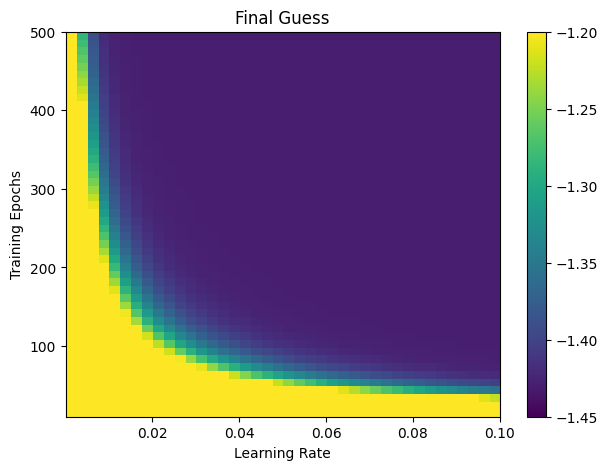

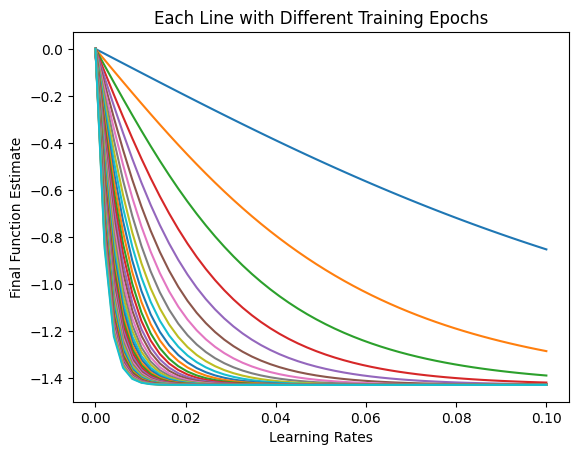

In [19]:
# [3] Interaction between learning rate and training epochs
# Setup parameters
learning_rates = np.linspace(1e-10, 1e-1, 50)
training_epochs = np.round(np.linspace(10, 500, 40))

# Initialize matrix to store results
final_results = np.zeros((len(learning_rates), len(training_epochs)))

# Loop over learning rates
for learning_rate_idx, learning_rate in enumerate(learning_rates):
    # Loop over training epochs
    for epoch_idx, train_epochs in enumerate(training_epochs):
        # Run through training (again fixing starting location)
        local_min = 0
        for i in range(int(train_epochs)):
            grad = derivative_of_function(local_min)
            local_min = local_min - learning_rate * grad
        # Store the final guess
        final_results[learning_rate_idx, epoch_idx] = local_min

# Plot the results
fig, ax = plt.subplots(figsize=(7, 5))

plt.imshow(final_results, extent=[learning_rates[0], learning_rates[-1], training_epochs[0], training_epochs[-1]], aspect='auto', origin='lower', vmin=-1.45, vmax=-1.2)
plt.xlabel('Learning Rate')
plt.ylabel('Training Epochs')
plt.title('Final Guess')
plt.colorbar()
plt.show()

# Another visualization
plt.plot(learning_rates, final_results)
plt.xlabel('Learning Rates')
plt.ylabel('Final Function Estimate')
plt.title('Each Line with Different Training Epochs')
plt.show()

# 2. Linear Regression
1. `torch.nn.Linear`
2. `torch.nn.MSELoss(size_average=None, reduce=None, reduction='mean')`

Generate synthetic data with `numpy.random.random(size=None)`.

In [11]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

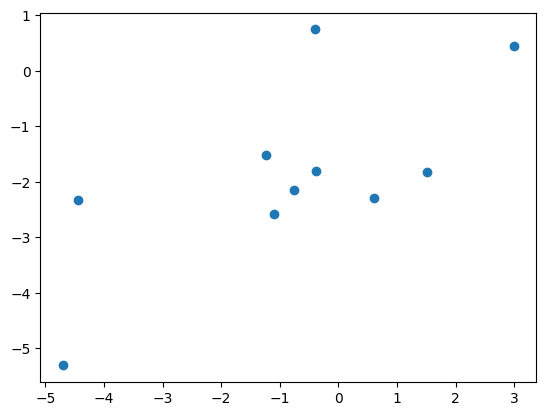

In [9]:
N = 10
# (-5, 5)
X = np.random.random(N) * 10 - 5
y = 0.5 * X - 1 + np.random.randn(N)

plt.scatter(X, y)

In [23]:
model = nn.Linear(1, 1)

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

X = X.reshape(N, 1)
y = y.reshape(N, 1)

# NumPy creates `float64` by default
inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(y.astype(np.float32))

type(inputs)

torch.Tensor

In [29]:
print(inputs)

tensor([[-0.7517],
        [-1.1045],
        [-1.2412],
        [-0.3923],
        [ 2.9923],
        [ 0.6128],
        [ 1.5206],
        [-4.7027],
        [-0.3810],
        [-4.4450]])


In [30]:
print(targets)

tensor([[-2.1424],
        [-2.5755],
        [-1.5125],
        [ 0.7460],
        [ 0.4411],
        [-2.2813],
        [-1.8139],
        [-5.3069],
        [-1.8115],
        [-2.3218]])


In [24]:
print("Optimizer's `state_dict`:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

Optimizer's `state_dict`:
state 	 {}
param_groups 	 [{'lr': 0.05, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'maximize': False, 'foreach': None, 'differentiable': False, 'fused': None, 'params': [0, 1]}]


In [25]:
print("Model's `state_dict`:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

Model's `state_dict`:
weight 	 torch.Size([1, 1])
bias 	 torch.Size([1])


In [26]:
optimizer.zero_grad()

print("Optimizer's `state_dict`:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

Optimizer's `state_dict`:
state 	 {}
param_groups 	 [{'lr': 0.05, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'maximize': False, 'foreach': None, 'differentiable': False, 'fused': None, 'params': [0, 1]}]


In [27]:
outputs = model(inputs)

print("Model's `state_dict`:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor])
    # print(param_tensor, "\t", model.state_dict()[param_tensor].size())

Model's `state_dict`:
weight 	 tensor([[0.7652]])
bias 	 tensor([-0.3949])


In [28]:
# input * weight + bias
print(outputs)

tensor([[-0.9701],
        [-1.2401],
        [-1.3446],
        [-0.6951],
        [ 1.8947],
        [ 0.0740],
        [ 0.7686],
        [-3.9934],
        [-0.6865],
        [-3.7962]], grad_fn=<AddmmBackward0>)


In [31]:
# sum((output - target)^2) / 10 = 2.4758
loss = criterion(outputs, targets)
print(loss)

tensor(2.4758, grad_fn=<MseLossBackward0>)


In [32]:
loss.backward()

In [41]:
print(model.weight.grad)
print(model.bias.grad)

tensor([[1.5338]])
tensor([1.7180])


In [42]:
optimizer.step()

In [43]:
# Nothing changes
print("Optimizer's `state_dict`:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

Optimizer's `state_dict`:
state 	 {}
param_groups 	 [{'lr': 0.05, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'maximize': False, 'foreach': None, 'differentiable': False, 'fused': None, 'params': [0, 1]}]


In [44]:
# 0.7652 - 1.5338 * 0.05 = 0.7652 - 0.07669 = 0.6885
# -0.3949 - 1.7180 * 0.05 = -0.4808
print("Model's `state_dict`:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor])

Model's `state_dict`:
weight 	 tensor([[0.6885]])
bias 	 tensor([-0.4808])


In [45]:
optimizer.zero_grad()

In [46]:
# Nothing changes
print("Optimizer's `state_dict`:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

Optimizer's `state_dict`:
state 	 {}
param_groups 	 [{'lr': 0.05, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'maximize': False, 'foreach': None, 'differentiable': False, 'fused': None, 'params': [0, 1]}]


In [47]:
# Nothing changes
print("Model's `state_dict`:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor])

Model's `state_dict`:
weight 	 tensor([[0.6885]])
bias 	 tensor([-0.4808])


In [48]:
print(model.weight.grad)
print(model.bias.grad)

None
None


In [4]:
n_epochs = 30
losses = []
for it in range(n_epochs):
    optimizer.zero_grad()
    
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    losses.append(loss.item())

    loss.backward()
    optimizer.step()

    print(f"Epoch {it+1}/{n_epochs}, Loss: {loss.item():.4f}")

Epoch 1/30, Loss: 3.7359
Epoch 2/30, Loss: 3.2713
Epoch 3/30, Loss: 2.9047
Epoch 4/30, Loss: 2.5957
Epoch 5/30, Loss: 2.3300
Epoch 6/30, Loss: 2.1002
Epoch 7/30, Loss: 1.9012
Epoch 8/30, Loss: 1.7288
Epoch 9/30, Loss: 1.5794
Epoch 10/30, Loss: 1.4499
Epoch 11/30, Loss: 1.3377
Epoch 12/30, Loss: 1.2405
Epoch 13/30, Loss: 1.1563
Epoch 14/30, Loss: 1.0833
Epoch 15/30, Loss: 1.0200
Epoch 16/30, Loss: 0.9652
Epoch 17/30, Loss: 0.9177
Epoch 18/30, Loss: 0.8765
Epoch 19/30, Loss: 0.8408
Epoch 20/30, Loss: 0.8099
Epoch 21/30, Loss: 0.7831
Epoch 22/30, Loss: 0.7599
Epoch 23/30, Loss: 0.7398
Epoch 24/30, Loss: 0.7223
Epoch 25/30, Loss: 0.7072
Epoch 26/30, Loss: 0.6941
Epoch 27/30, Loss: 0.6828
Epoch 28/30, Loss: 0.6730
Epoch 29/30, Loss: 0.6644
Epoch 30/30, Loss: 0.6571


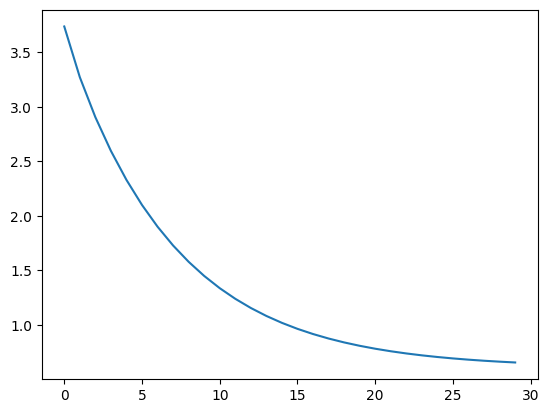

In [5]:
plt.plot(losses)

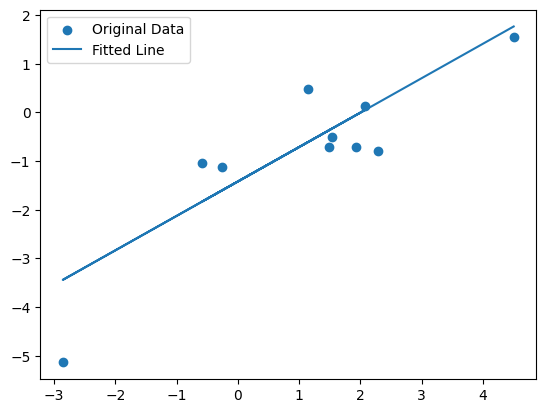

In [6]:
predictions = model(inputs).detach().numpy()
plt.scatter(X, y, label="Original Data")
plt.plot(X, predictions, label="Fitted Line")
plt.legend()
plt.show()

In [7]:
w = model.weight.data.numpy()
b = model.bias.data.numpy()
# (0.5, -1)
print(w, b)

[[0.70741653]] [-1.4193791]


# 3. Logistic Regression

- **Binary Logistic Regression**, or **Binomial Logistic Regression** models the relationship between a set of independent variables and a binary dependent variable. For example, "true" or "false", "positive" or "negative".
- **Multiclass logistic regression**, **Multinomial Logistic Regression** or **Softmax Regression** is an extension of logistic regression for multiclass classification. For example, "red", "green", "blue".
    - The **One vs Rest (OVR)** or **One vs All** strategy splits a multiclass classification into one binary classification problem per class. For example, "red" or "green/blue", "green" or "blue/red", "blue" or "red, green". Softmax regression calculates the probabilities for each class and normalizes them using the softmax function, ensuring they sum up to one.
    - The **One vs One (OvO)** strategy splits a multiclass classification into one binary classification problem per each pair of classes.

**Binary Cross Entropy** for **Binary Classification**:
1. `torch.nn.BCELoss(weight=None, size_average=None, reduce=None, reduction='mean')`
2. `torch.nn.BCEWithLogitsLoss(weight=None, size_average=None, reduce=None, reduction='mean', pos_weight=None)`: Combines a `Sigmoid` layer and the `BCELoss` in one single class.

**Cross Entropy Loss** for **Multiclass Classification**: 
1. `torch.nn.CrossEntropyLoss(weight=None, size_average=None, ignore_index=-100, reduce=None, reduction='mean', label_smoothing=0.0)`: Computes the cross entropy loss between input logits and target.

[Diagnostic Wisconsin Breast Cancer Database](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)
- `sklearn.datasets.load_breast_cancer(*, return_X_y=False, as_frame=False)`

In [177]:
from sklearn.datasets import load_breast_cancer

In [178]:
data = load_breast_cancer()
type(data)

sklearn.utils._bunch.Bunch

In [179]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [180]:
data.data.shape

(569, 30)

In [181]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [182]:
data.target.shape

(569,)

In [183]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [184]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [185]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape
N, D

(381, 30)

In [186]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [133]:
model = nn.Sequential(
    nn.Linear(D,1), 
    nn.Sigmoid()
)

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters())

In [187]:
y_train.shape

(381,)

In [188]:
y_train.astype(np.float32).reshape(-1, 1).shape

(381, 1)

In [189]:
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1, 1))
y_test = torch.from_numpy(y_test.astype(np.float32).reshape(-1, 1))

In [137]:
n_epochs = 1000

train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

for it in range(n_epochs):
    optimizer.zero_grad()

    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    loss.backward()
    optimizer.step()

    outputs_test = model(X_test)
    loss_test = criterion(outputs_test, y_test)

    train_losses[it] = loss.item()
    test_losses[it] = loss_test.item()

    if (it + 1) % 50 == 0:
        print(f"Epoch {it+1}/{n_epochs}, Train Loss: {loss.item():.4f}, Test Loss: {loss_test.item():.4f}")

Epoch 50/1000, Train Loss: 0.5543, Test Loss: 0.5545
Epoch 100/1000, Train Loss: 0.4093, Test Loss: 0.4079
Epoch 150/1000, Train Loss: 0.3302, Test Loss: 0.3276
Epoch 200/1000, Train Loss: 0.2800, Test Loss: 0.2766
Epoch 250/1000, Train Loss: 0.2450, Test Loss: 0.2411
Epoch 300/1000, Train Loss: 0.2191, Test Loss: 0.2149
Epoch 350/1000, Train Loss: 0.1993, Test Loss: 0.1947
Epoch 400/1000, Train Loss: 0.1836, Test Loss: 0.1788
Epoch 450/1000, Train Loss: 0.1709, Test Loss: 0.1658
Epoch 500/1000, Train Loss: 0.1604, Test Loss: 0.1552
Epoch 550/1000, Train Loss: 0.1516, Test Loss: 0.1462
Epoch 600/1000, Train Loss: 0.1441, Test Loss: 0.1386
Epoch 650/1000, Train Loss: 0.1376, Test Loss: 0.1321
Epoch 700/1000, Train Loss: 0.1319, Test Loss: 0.1264
Epoch 750/1000, Train Loss: 0.1269, Test Loss: 0.1215
Epoch 800/1000, Train Loss: 0.1224, Test Loss: 0.1170
Epoch 850/1000, Train Loss: 0.1185, Test Loss: 0.1131
Epoch 900/1000, Train Loss: 0.1149, Test Loss: 0.1096
Epoch 950/1000, Train Loss: 0

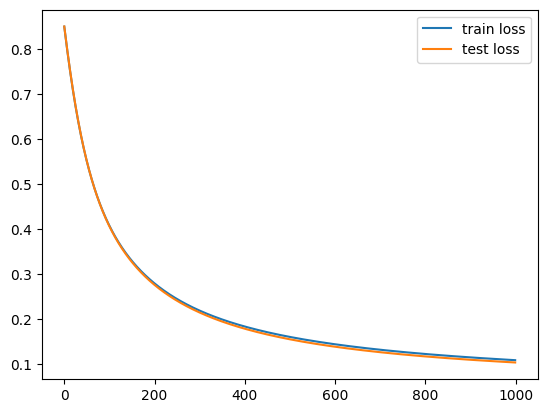

In [138]:
plt.plot(train_losses, label="train loss")
plt.plot(test_losses, label="test loss")
plt.legend()
plt.show()

In [139]:
with torch.no_grad():
    p_train = model(X_train)
    p_train = np.round(p_train.numpy())
    train_acc = np.mean(y_train.numpy() == p_train)

    p_test = model(X_test)
    p_test = np.round(p_test.numpy())
    test_acc = np.mean(y_test.numpy() == p_test)
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.9738, Test acc: 0.9734


In [190]:
# `BCEWithLogitsLoss()`
model_2 = nn.Linear(D,1)

criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model_2.parameters())

In [196]:
print(model_2)

Linear(in_features=30, out_features=1, bias=True)


In [191]:
n_epochs = 1000

train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)
train_acc = np.zeros(n_epochs)
test_acc = np.zeros(n_epochs)

for it in range(n_epochs):
    optimizer.zero_grad()

    outputs = model_2(X_train)
    loss = criterion(outputs, y_train)

    loss.backward()
    optimizer.step()

    outputs_test = model_2(X_test)
    loss_test = criterion(outputs_test, y_test)

    train_losses[it] = loss.item()
    test_losses[it] = loss_test.item()

    if (it + 1) % 50 == 0:
        print(f"Epoch {it+1}/{n_epochs}, Train Loss: {loss.item():.4f}, Test Loss: {loss_test.item():.4f}")

Epoch 50/1000, Train Loss: 0.5003, Test Loss: 0.4939
Epoch 100/1000, Train Loss: 0.3675, Test Loss: 0.3612
Epoch 150/1000, Train Loss: 0.2979, Test Loss: 0.2907
Epoch 200/1000, Train Loss: 0.2547, Test Loss: 0.2462
Epoch 250/1000, Train Loss: 0.2250, Test Loss: 0.2151
Epoch 300/1000, Train Loss: 0.2032, Test Loss: 0.1920
Epoch 350/1000, Train Loss: 0.1865, Test Loss: 0.1741
Epoch 400/1000, Train Loss: 0.1732, Test Loss: 0.1597
Epoch 450/1000, Train Loss: 0.1625, Test Loss: 0.1480
Epoch 500/1000, Train Loss: 0.1536, Test Loss: 0.1383
Epoch 550/1000, Train Loss: 0.1461, Test Loss: 0.1301
Epoch 600/1000, Train Loss: 0.1397, Test Loss: 0.1231
Epoch 650/1000, Train Loss: 0.1342, Test Loss: 0.1171
Epoch 700/1000, Train Loss: 0.1293, Test Loss: 0.1118
Epoch 750/1000, Train Loss: 0.1250, Test Loss: 0.1072
Epoch 800/1000, Train Loss: 0.1212, Test Loss: 0.1031
Epoch 850/1000, Train Loss: 0.1177, Test Loss: 0.0995
Epoch 900/1000, Train Loss: 0.1146, Test Loss: 0.0962
Epoch 950/1000, Train Loss: 0

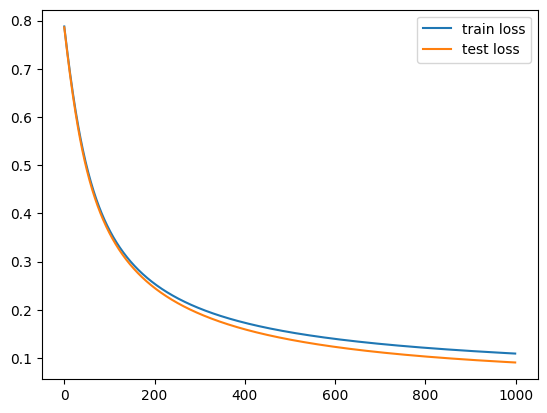

In [192]:
plt.plot(train_losses, label="train loss")
plt.plot(test_losses, label="test loss")
plt.legend()
plt.show()

In [194]:
with torch.no_grad():
    p_train = model_2(X_train)
    p_train = (p_train.numpy() > 0)
    train_acc = np.mean(y_train.numpy() == p_train)

    p_test = model_2(X_test)
    p_test = p_test.numpy() > 0
    test_acc = np.mean(y_test.numpy() == p_test)
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.9738, Test acc: 0.9840


# 4. Artificial Neural Network (ANN)
- **Single Layer Artificial Neural Network**, or **Single Layer Neural Network** is the simplest form of an artificial neural network, often referred to as a "perceptron".
    - A **Perceptron**, **Single Layer Perceptron**, or **McCulloch–Pitts Neuron**, is an algorithm for supervised learning a binary classifier called threshold function. In the context of neural networks, a perceptron is an artificial neuron using the Heaviside step function as the activation function. The perceptron was intended to be a machine, rather than a program, and the first hardware implementation is **Mark I Perceptron** by Frank Rosenblatt.
    - [Perceptron](https://en.wikipedia.org/wiki/Perceptron#Learning_algorithm_for_a_single-layer_perceptron)
    - If you have a single layer neural network with logistic activation function, and assuming you maximize the log-likelihood (or minimize the cross entropy), then you are performing logistic regression.
    - [Logistic Regression as a Single Layer Perceptron](https://en.wikipedia.org/wiki/Logistic_regression#As_a_single-layer_perceptron)
- **Single Hidden-Layer Neural Network**
## 4-1. Regression
Use random data generated by PyTorch with a formula as sample data.

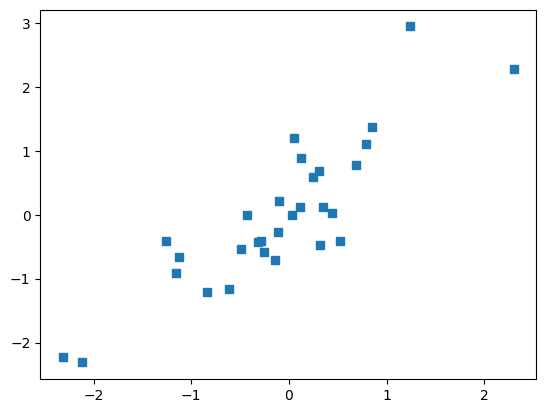

In [2]:
import torch
import matplotlib.pyplot as plt

# Create data
N = 30
torch.manual_seed(0)
x = torch.randn(N, 1)
y = x + torch.randn(N, 1) / 2

# Plot
plt.plot(x, y, 's')
plt.show()

In [5]:
# build model
regression_model = torch.nn.Sequential(
    torch.nn.Linear(1, 10),  
    torch.nn.ReLU(),
    torch.nn.Linear(10, 1)
)
print(regression_model)

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=1, bias=True)
)


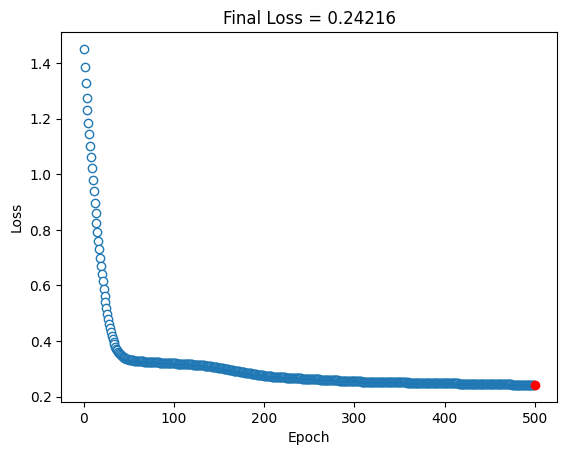

In [6]:
# Learning rate
learning_rate = 0.05

# Loss function
loss_fn = torch.nn.MSELoss()

# Optimizer
optimizer = torch.optim.SGD(regression_model.parameters(), lr=learning_rate)

# Train the model
num_epochs = 500
losses = torch.zeros(num_epochs)

for epoch in range(num_epochs):
    # Forward pass
    y_hat = regression_model(x)

    # Compute loss
    loss = loss_fn(y_hat, y)
    losses[epoch] = loss

    # Back propagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Manually compute losses
predictions = regression_model(x)

# Final loss (MSE)
test_loss = (predictions - y).pow(2).mean()

# Plot the losses
plt.plot(losses.detach(), 'o' , markerfacecolor='w', linewidth=0.1)
plt.plot(num_epochs, test_loss.detach(), 'ro')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Final Loss = %g' % test_loss.item())
plt.show()

In [7]:
test_loss.item()

0.2421601563692093

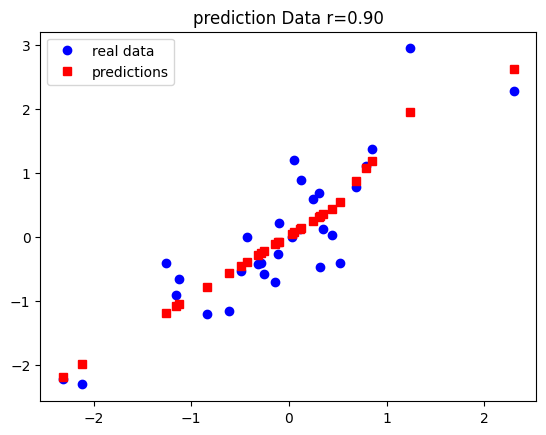

In [10]:
import numpy as np

# Plot the data
plt.plot(x, y, 'bo', label='real data')
plt.plot(x, predictions.detach(), 'rs', label='predictions')
plt.title(f'prediction Data r={np.corrcoef(y.T, predictions.detach().T)[0, 1]:.2f}')
plt.legend()
plt.show()

## 4-2. Binary Classification
Use random data generated by NumPy with a translation as sample data. Then we make comparisons with varying learning rate.

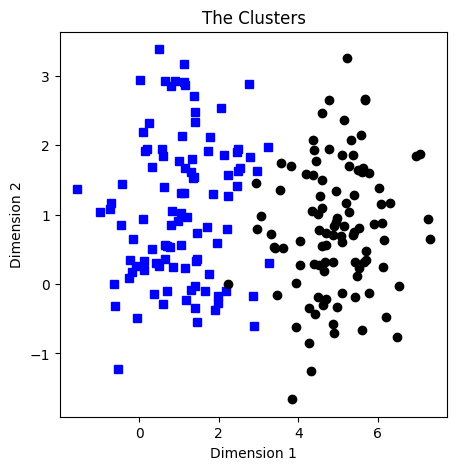

In [31]:
# Create data
num_per_cluster = 100
blur = 1

A = [1, 1]
B = [5, 1]

# Generate data
np.random.seed(0)
a = [A[0] + np.random.randn(num_per_cluster) * blur, A[1] + np.random.randn(num_per_cluster) * blur]
b = [B[0] + np.random.randn(num_per_cluster) * blur, B[1] + np.random.randn(num_per_cluster) * blur]

# True labels
labels_np = np.vstack((np.zeros((num_per_cluster, 1)), np.ones((num_per_cluster, 1))))

# Concatanate into a matrix
data_np = np.hstack((a, b)).T

# Convert to a PyTorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# show the data
fig = plt.figure(figsize=(5, 5))
plt.plot(data[np.where(labels==0)[0], 0], data[np.where(labels==0)[0], 1], 'bs')
plt.plot(data[np.where(labels==1)[0], 0], data[np.where(labels==1)[0], 1], 'ko')
plt.title('The Clusters')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

In [32]:
# Inspect types
print("Data Type in NumPy:", type(data_np))
print("Data Shape in NumPy:", np.shape(data_np))
print(" ")

print("Data Type in PyTorch:", type(data))
print("Data Shape in PyTorch:", np.shape(data))

Data Type in NumPy: <class 'numpy.ndarray'>
Data Shape in NumPy: (200, 2)
 
Data Type in PyTorch: <class 'torch.Tensor'>
Data Shape in PyTorch: torch.Size([200, 2])


In [33]:
# Build the model
classification_model = torch.nn.Sequential(
    torch.nn.Linear(2, 10),
    torch.nn.ReLU(),
    torch.nn.Linear(10, 1),
    torch.nn.Sigmoid()
)
print(classification_model)

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=1, bias=True)
  (3): Sigmoid()
)


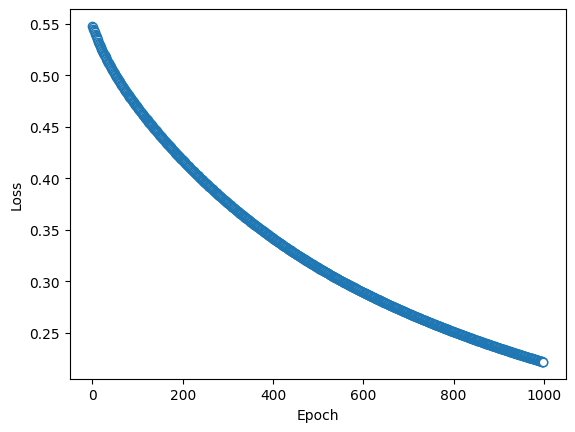

In [34]:
# Setup hyperparameters
learning_rate = 0.01

# Loss function
loss_fn = torch.nn.BCELoss()

# Optimizer
optimizer = torch.optim.SGD(classification_model.parameters(), lr=learning_rate)

# Train the model
num_epochs = 1000
losses = torch.zeros(num_epochs)

for epoch in range(num_epochs):
    # Forward pass
    y_hat = classification_model(data)

    # Compute loss
    loss = loss_fn(y_hat, labels)
    losses[epoch] = loss

    # back propagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Show the losses
plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=0.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [35]:
# Manually compute losses
predictions = classification_model(data)
predicted_labels = predictions > 0.5

# print(predicted_labels)
# tensor([[False], [ True], [ True], [False], [ True], ...])

# print(labels)
# tensor([[0.], [0.], [0.], [0.], [0.], ...])

# Find errors
misclassified = np.where(predicted_labels != labels)[0]

# print(np.where(predicted_labels != labels))
# (array([  1,   2,   4,  12,  21,  24,  67,  81,  85,  86,  93, 137]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

# Total accuracy
total_accuracy = 100 - 100 * len(misclassified) / (2 * num_per_cluster)

print('Final Accuracy: %g%%' % total_accuracy)

Final Accuracy: 93.5%


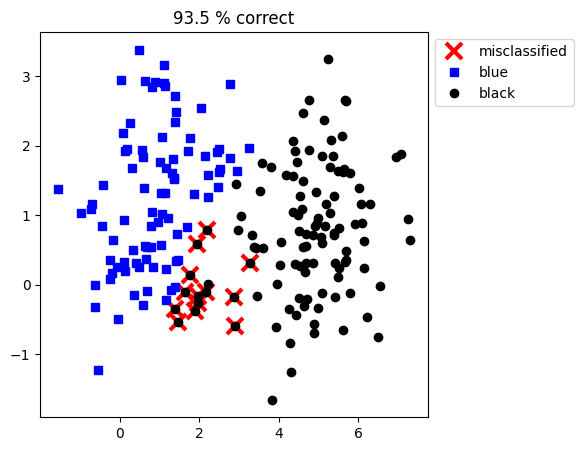

In [36]:
# Plot the labeled data
fig = plt.figure(figsize=(5, 5))
plt.plot(data[misclassified, 0], data[misclassified, 1], 'rx', markersize=12, markeredgewidth=3)
plt.plot(data[np.where(~predicted_labels)[0], 0], data[np.where(~predicted_labels)[0], 1], 'bs')
plt.plot(data[np.where(predicted_labels)[0], 0], data[np.where(predicted_labels)[0], 1], 'ko')

plt.legend(['misclassified', 'blue', 'black'], bbox_to_anchor=(1, 1))
plt.title(f'{total_accuracy} % correct')
plt.show()

In [37]:
# Create functions for simplify the code of experiments
def create_model(learning_rate):
    # Model architecture
    model = torch.nn.Sequential(
        torch.nn.Linear(2, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1)
        # torch.nn.Sigmoid(),
    )

    # Loss function
    loss_fn = torch.nn.BCEWithLogitsLoss()

    # Optimizer
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

    # Model output
    return model, loss_fn, optimizer

def train(model):
    # Initialize losses
    losses = torch.zeros(num_epochs)

    # Loop over epochs
    for epoch in range(num_epochs):
        # Forward pass
        y_hat = model(data)

        # Compute loss
        loss = loss_fn(y_hat, labels)
        losses[epoch] = loss

        # Back propagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Make a prediction
    predictions = model(data)
    
    # Compute the predictions (already applied logits) and report accuracy
    total_accuracy = 100 * torch.mean(((predictions > 0) == labels).float())
  
    return losses, predictions, total_accuracy

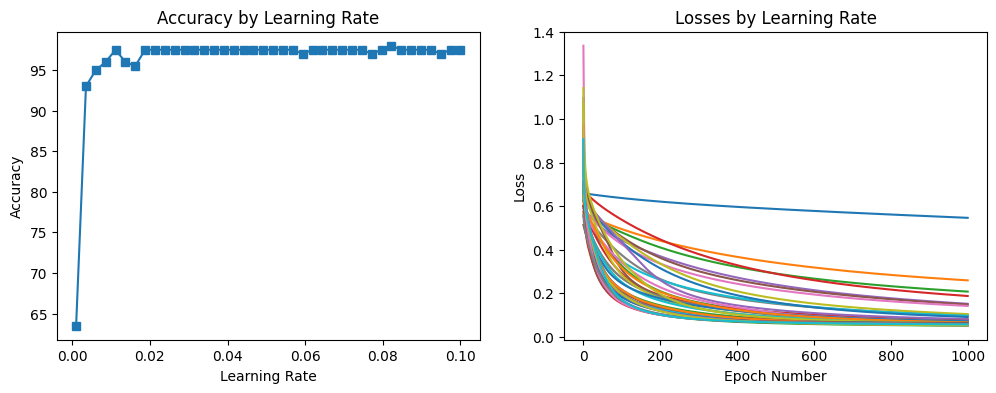

In [39]:
# Create the set of learning rates to test
learning_rates = np.linspace(0.001, 0.1, 40)

# Initialize results output
accuracy_by_learning_rate = []
all_losses = np.zeros((len(learning_rates), num_epochs))

# Loop through learning rates
for idx, lr in enumerate(learning_rates):
    # Create and run the model
    model, loss_fn, optimizer = create_model(lr)
    losses, predictions, total_accuracy = train(model)

    # Store the results
    accuracy_by_learning_rate.append(total_accuracy)
    all_losses[idx, :] = losses.detach()

# plot the results
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(learning_rates, accuracy_by_learning_rate, 's-')
ax[0].set_xlabel('Learning Rate')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy by Learning Rate')

ax[1].plot(all_losses.T)
ax[1].set_title('Losses by Learning Rate')
ax[1].set_xlabel('Epoch Number')
ax[1].set_ylabel('Loss')
plt.show()

In [40]:
# proportion of runs where the model had at least 70% accuracy
sum(torch.tensor(accuracy_by_learning_rate) > 70) / len(accuracy_by_learning_rate)

tensor(0.9750)

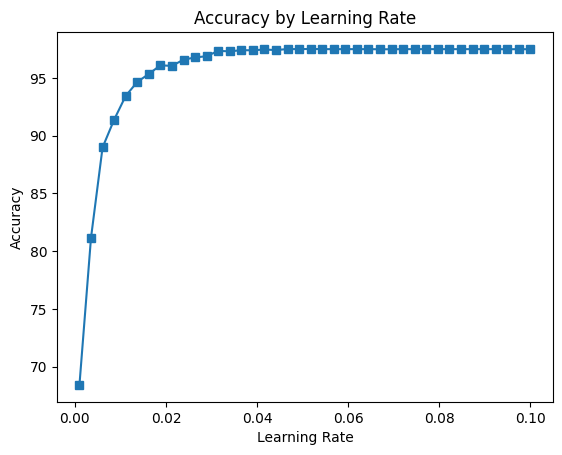

In [41]:
# Run a meta-experiment by repeating the experiment N times (different random weight initializations each time)
# Number of times to iterate through the experiment
num_experiments = 50

# Matrix to store all results
accuracy_matrix = np.zeros((num_experiments, len(learning_rates)))

# Fewer epochs to reduce computation time
num_epochs = 500

# Run the experiment
for experiment in range(num_experiments):
    for idx, lr in enumerate(learning_rates):
        # Create and run the model
        model, loss_fn, optimizer = create_model(lr)
        losses, predictions, total_accuracy = train(model)

        # Store the results
        accuracy_matrix[experiment, idx] = total_accuracy

# Plot the results averaged over experiments
plt.plot(learning_rates, np.mean(accuracy_matrix, axis=0), 's-')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Accuracy by Learning Rate')
plt.show()

## 4-3. Non-Linearity

Demonstrate **Non-Linearity** with`sklearn.datasets.make_circles(n_samples=100, *, shuffle=True, noise=None, random_state=None, factor=0.8)`.

In [150]:
# Blob data
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, noise=0.03, random_state=100)
len(X), len(y)

(1000, 1000)

In [151]:
print(f"First 5 samples of X:\n {X[:5]}")
print(f"First 5 samples of y:\n {y[:5]}")

First 5 samples of X:
 [[-1.00038985  0.02348052]
 [-0.19036705 -1.01750748]
 [ 0.71463597  0.37954286]
 [ 0.60316858 -0.78886949]
 [ 0.56238969  0.56515025]]
First 5 samples of y:
 [0 0 1 0 1]


In [152]:
import pandas as pd

# Make DataFrame of circle data
circles = pd.DataFrame({
    "X_1": X[:, 0],
    "X_2": X[:, 1],
    "label": y
})
circles.head(10)

,X_1,X_2,label
0,-1.000390,0.023481,0
1,-0.190367,-1.017507,0
2,0.714636,0.379543,1
3,0.603169,-0.788869,0
4,0.562390,0.565150,1
5,0.025748,1.006406,0
6,1.050432,-0.097989,0
7,0.623187,0.525558,1
8,0.747905,-0.180497,1
9,0.559672,-0.620578,1


In [153]:
circles.label.value_counts()

label
0    500
1    500
Name: count, dtype: int64

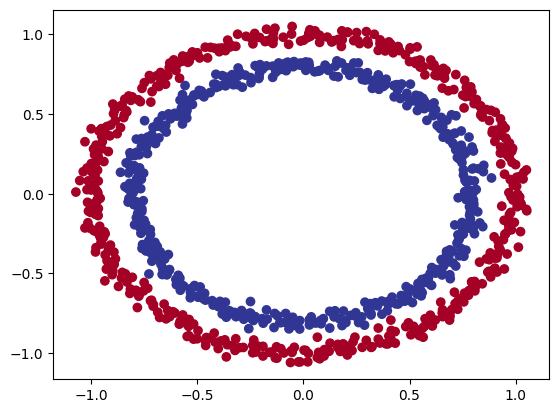

In [154]:
import matplotlib.pyplot as plt

# Visualize
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

In [155]:
X.shape, y.shape

((1000, 2), (1000,))

In [156]:
# View the first sample of features & labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [-1.00038985  0.02348052] and the same for y: 0
Shapes for one sample of X: (2,) and the same for y: ()


In [157]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [158]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[-1.0004,  0.0235],
         [-0.1904, -1.0175],
         [ 0.7146,  0.3795],
         [ 0.6032, -0.7889],
         [ 0.5624,  0.5652]]),
 tensor([0., 0., 1., 0., 1.]))

In [159]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [160]:
from sklearn.model_selection import train_test_split

# Split data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=36)
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [161]:
X_train.shape

torch.Size([800, 2])

In [14]:
# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [163]:
# [1] Construct a model that subclasses `nn.module`
class LinearSingleHiddenLayerNeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    # [2] Create 2 `nn.Linear` layers capable of handling the shapes of our data
    self.hidden = nn.Linear(in_features=2, out_features=10)
    self.output = nn.Linear(in_features=10, out_features=1)

  # [3] Define a `forward()` method that outlines the forward pass
  def forward(self, x):
    return self.output(self.hidden(x))

# Replicate the model using `nn.Sequential()`
# model_0 = nn.Sequential(
#     nn.Linear(in_features=2, out_features=5),
#     nn.Linear(in_features=5, out_features=1)
# ).to(device)

# [4] Instantiate an instance of the model class and send it to the target device
linear_model = LinearSingleHiddenLayerNeuralNetwork().to(device)
linear_model

LinearSingleHiddenLayerNeuralNetwork(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (output): Linear(in_features=10, out_features=1, bias=True)
)

In [164]:
# Setup the loss function
# loss_fn = nn.BCELoss()
loss_fn = nn.BCEWithLogitsLoss()

# Setup the optimizer
optimizer = torch.optim.SGD(params=linear_model.parameters(), lr=0.1)

In [165]:
# Calculate accuracy
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

In [166]:
torch.manual_seed(100)
torch.cuda.manual_seed(100)

# Set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training & evaluation loop
for epoch in range(epochs):
  # Training
  linear_model.train()

  # [1] Forward pass
  y_logits = linear_model(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # [2] Calculate loss/acc
  # `nn.BCELoss` expects prediction probabilities as input
  # loss = loss_fn(torch.sigmoid(y_logits), y_train)
  # `nn.BCEWithLogitsLoss` expects raw logits as input
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

  # [3] Optimizer zero grad
  optimizer.zero_grad()

  # [4] Loss backward (back propagation)
  loss.backward()

  # [5] Optimizer step (gradient descent)
  optimizer.step()

  # Testing
  linear_model.eval()
  with torch.inference_mode():
    # [1] Forward pass
    test_logits = linear_model(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # [2] Calculate test loss/acc
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc}%")

Epoch: 0 | Loss: 0.69975, Acc: 50.75% | Test loss: 0.69323, Test acc: 51.5%
Epoch: 10 | Loss: 0.69696, Acc: 51.12% | Test loss: 0.69298, Test acc: 53.5%
Epoch: 20 | Loss: 0.69529, Acc: 50.75% | Test loss: 0.69319, Test acc: 54.50000000000001%
Epoch: 30 | Loss: 0.69428, Acc: 51.38% | Test loss: 0.69361, Test acc: 55.50000000000001%
Epoch: 40 | Loss: 0.69367, Acc: 51.75% | Test loss: 0.69409, Test acc: 54.0%
Epoch: 50 | Loss: 0.69330, Acc: 54.00% | Test loss: 0.69455, Test acc: 53.0%
Epoch: 60 | Loss: 0.69308, Acc: 55.75% | Test loss: 0.69497, Test acc: 52.5%
Epoch: 70 | Loss: 0.69294, Acc: 56.12% | Test loss: 0.69533, Test acc: 50.0%
Epoch: 80 | Loss: 0.69286, Acc: 55.50% | Test loss: 0.69563, Test acc: 48.5%
Epoch: 90 | Loss: 0.69280, Acc: 53.87% | Test loss: 0.69588, Test acc: 47.0%


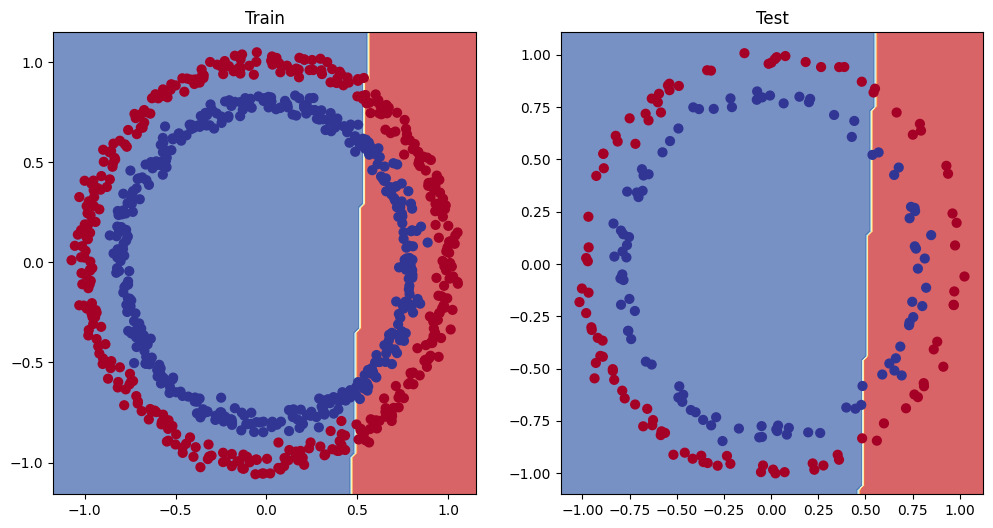

In [167]:
# Plot decision boundaries of model predicting on X in comparison to y
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
  # Put everything to CPU for working better with NumPy & Matplotlib
  model.to("cpu")
  X, y = X.to("cpu"), y.to("cpu")

  # Setup prediction boundaries & grid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

  # Make features
  X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

  # Make predictions
  model.eval()
  with torch.inference_mode():
    y_logits = model(X_to_pred_on)

  # Test for multi-class or binary and adjust logits to prediction labels
  if len(torch.unique(y)) > 2:
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
  else:
    y_pred = torch.round(torch.sigmoid(y_logits))  # binary

  # Reshape preds and plot
  y_pred = y_pred.reshape(xx.shape).detach().numpy()
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(linear_model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(linear_model, X_test, y_test)

In [168]:
class NonlinearSingleHiddenLayerNeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()
    # relu is a non-linear activation function
    
  def forward(self, x):
    return self.layer_2(self.relu(self.layer_1(x)))

nonlinear_model = NonlinearSingleHiddenLayerNeuralNetwork().to(device)
nonlinear_model

NonlinearSingleHiddenLayerNeuralNetwork(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [169]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(nonlinear_model.parameters(), lr=0.1)

# Write a training and evaluation loop for model_1
torch.manual_seed(100)
torch.cuda.manual_seed(100)

# Train for longer
epochs = 1000

# Put data on the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  # Training
  nonlinear_model.train()
  # [1] Forward pass
  y_logits = nonlinear_model(X_train).squeeze()
  # Raw logits to prediction probabilities to prediction labels
  y_pred = torch.round(torch.sigmoid(y_logits))

  # [2] Calculate the loss/acc
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

  # [3] Optimizer zero grad
  optimizer.zero_grad()

  # [4] Loss backward (backpropagation)
  loss.backward()

  # [5] Optimizer step (gradient descent)
  optimizer.step()

  # Testing
  nonlinear_model.eval()
  with torch.inference_mode():
    # [1] Forward pass
    test_logits = nonlinear_model(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    # [2] Calculate loss
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc}%")

Epoch: 0 | Loss: 0.69838, Acc: 48.62% | Test loss: 0.68964, Test acc: 52.5%
Epoch: 100 | Loss: 0.68619, Acc: 62.50% | Test loss: 0.68570, Test acc: 61.0%
Epoch: 200 | Loss: 0.68017, Acc: 61.88% | Test loss: 0.68166, Test acc: 65.0%
Epoch: 300 | Loss: 0.67444, Acc: 62.88% | Test loss: 0.67679, Test acc: 65.0%
Epoch: 400 | Loss: 0.66742, Acc: 66.75% | Test loss: 0.67034, Test acc: 66.5%
Epoch: 500 | Loss: 0.65866, Acc: 72.25% | Test loss: 0.66235, Test acc: 71.0%
Epoch: 600 | Loss: 0.64813, Acc: 77.88% | Test loss: 0.65298, Test acc: 79.5%
Epoch: 700 | Loss: 0.63504, Acc: 81.38% | Test loss: 0.64180, Test acc: 83.5%
Epoch: 800 | Loss: 0.61958, Acc: 86.12% | Test loss: 0.62814, Test acc: 87.5%
Epoch: 900 | Loss: 0.60134, Acc: 90.38% | Test loss: 0.61210, Test acc: 88.5%


In [170]:
# Makes predictions
nonlinear_model.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(nonlinear_model(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 0., 0., 0., 1., 0., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 0., 0., 0., 1., 0., 0.], device='cuda:0'))

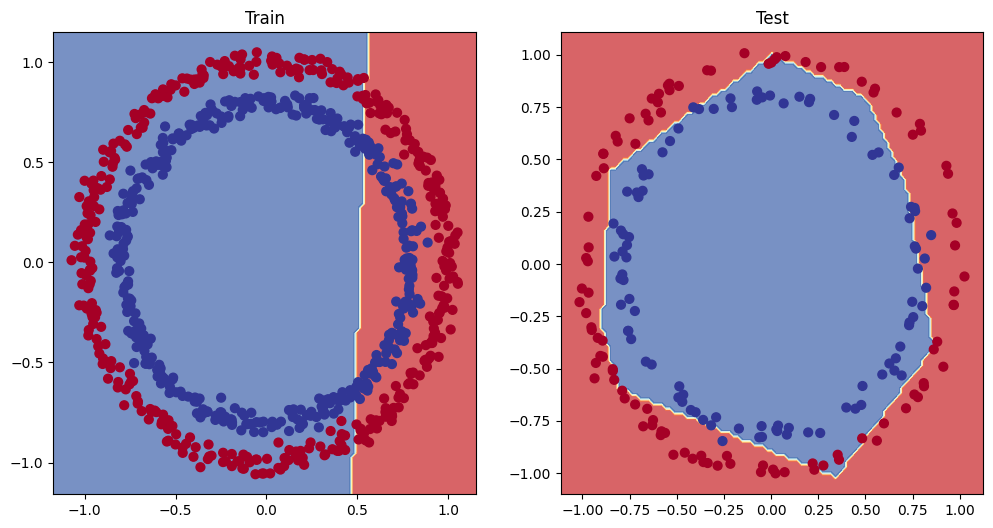

In [171]:
# Plot decision boundaries
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
# `model_1` has no non-linearity
plot_decision_boundary(linear_model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
# `model_2` has non-linearity
plot_decision_boundary(nonlinear_model, X_test, y_test)

# 5. Deep Neural Networks (DNNs)
A fully connected multi-layer feedforward neural network with a nonlinear activation function is called a **Multilayer Perceptron (MLP)**. A MLP consists of three or more layers (an input and an output layer with one or more hidden layers).
- MLP is a misnomer.
- An input layer is not a layer; it's just input data. Hidden layers are the layers that processing happens.
    - `tensorflow.keras.Input(shape=None, batch_size=None, dtype=None, sparse=None, batch_shape=None, name=None, tensor=None)` only serves as a specification of the kind of input the model expects, including the dimensions and type of data, does not hold any data itself.
    - There is no equivalent for PyTorch. To instantiate the input layer, you can create an uninitialized tensor using `torch.empty` or, instead, use `torch.zeros` to initialize it with zeros like TensorFlow's default.

## 5-1. Multiclass Classification
Generate isotropic Gaussian blobs using `sklearn.datasets.make_blobs(n_samples=100, n_features=2, *, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None, return_centers=False)` to demonstrate multiclass classification.

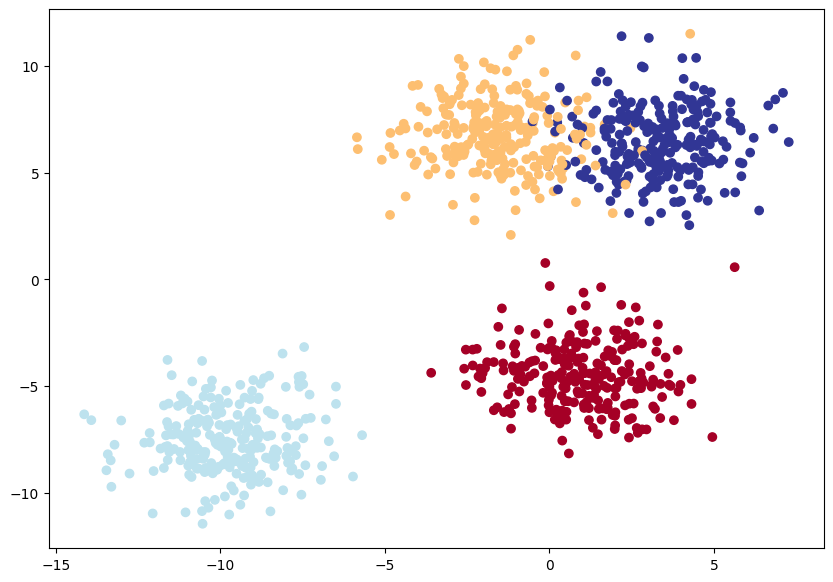

In [172]:
from sklearn.datasets import make_blobs

# Multi-class
# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 100

# [1] Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED)

# [2] Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# [3] Split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)

# [4] Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

In [173]:
# Build a multi-class classification model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    """Initializes multi-class classification model.

    Args:
      input_features (int): Number of input features to the model
      output_features (int): Number of outputs features (number of output classes)
      hidden_units (int): Number of hidden units between layers, default 8

    Returns:

    Example:
    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        # nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        # nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

# Create an instance of BlobModel and send it to the target device
model_3 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8).to(device)

model_3

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [174]:
X_blob_train.shape, y_blob_train[:5]

(torch.Size([800, 2]), tensor([1, 3, 3, 0, 2]))

In [175]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

In [176]:
# Create a loss function for multi-class classification
loss_fn = nn.CrossEntropyLoss()

# Create an optimizer for multi-class classification
optimizer = torch.optim.SGD(params=model_3.parameters(), lr=0.1)

# Get some raw outputs of the model (logits)
model_2.eval()
with torch.inference_mode():
  y_logits = model_3(X_blob_test.to(device))

y_logits[:10]

tensor([[-0.4492, -0.4329, -1.1219,  0.0512],
        [ 1.5299,  2.0159, -0.1637,  1.9851],
        [-0.0509,  1.9585,  1.6363, -0.7892],
        [-0.7101,  0.6771,  0.6877, -1.1317],
        [-0.4827, -0.4282, -1.0757, -0.0115],
        [-0.3630,  1.4567,  1.3288, -1.0193],
        [-0.5467, -0.5626, -1.1814, -0.0382],
        [ 1.3230,  2.0274,  0.0976,  1.6096],
        [ 0.0113,  1.9458,  1.5452, -0.6705],
        [-0.5504, -0.1839, -0.6653, -0.2902]], device='cuda:0')

In [177]:
y_blob_test[:10]

tensor([0, 2, 1, 3, 0, 1, 0, 2, 1, 0])

In [178]:
# Convert the model's logit outputs to prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_pred_probs[:10])

tensor([[0.2395, 0.2434, 0.1222, 0.3950],
        [0.2280, 0.3707, 0.0419, 0.3594],
        [0.0697, 0.5201, 0.3768, 0.0333],
        [0.1030, 0.4125, 0.4169, 0.0676],
        [0.2375, 0.2508, 0.1312, 0.3805],
        [0.0762, 0.4703, 0.4139, 0.0395],
        [0.2394, 0.2356, 0.1269, 0.3981],
        [0.2151, 0.4352, 0.0632, 0.2865],
        [0.0766, 0.5298, 0.3549, 0.0387],
        [0.2159, 0.3115, 0.1925, 0.2801]], device='cuda:0')


In [179]:
# Convert the model's prediction probabilities to prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([3, 1, 1, 2, 3, 1, 3, 1, 1, 1, 3, 3, 1, 1, 3, 1, 3, 1, 3, 1, 1, 3, 3, 1,
        3, 3, 2, 1, 3, 3, 1, 3, 1, 3, 1, 1, 3, 3, 3, 1, 1, 1, 1, 2, 1, 1, 1, 2,
        2, 3, 2, 1, 2, 3, 3, 3, 3, 3, 1, 2, 2, 3, 3, 3, 1, 3, 3, 1, 2, 2, 3, 3,
        1, 3, 2, 3, 1, 3, 2, 1, 1, 1, 1, 3, 2, 3, 2, 1, 3, 1, 3, 2, 1, 2, 3, 3,
        3, 3, 1, 2, 3, 2, 1, 3, 1, 3, 3, 2, 3, 1, 1, 2, 3, 3, 2, 3, 3, 1, 3, 3,
        1, 3, 3, 2, 1, 3, 2, 1, 1, 2, 1, 1, 1, 1, 3, 3, 3, 1, 1, 2, 1, 3, 2, 1,
        3, 1, 1, 3, 3, 3, 2, 3, 1, 3, 3, 1, 3, 1, 2, 1, 2, 3, 1, 1, 3, 1, 3, 3,
        2, 3, 3, 1, 3, 3, 1, 3, 2, 3, 1, 1, 3, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 3,
        1, 3, 3, 3, 1, 2, 1, 3], device='cuda:0')

In [180]:
y_blob_test

tensor([0, 2, 1, 3, 0, 1, 0, 2, 1, 0, 2, 2, 1, 1, 0, 1, 0, 1, 0, 1, 2, 2, 2, 0,
        0, 2, 3, 0, 0, 2, 1, 2, 3, 0, 1, 1, 2, 0, 0, 1, 3, 1, 2, 3, 1, 2, 1, 3,
        3, 2, 3, 1, 3, 0, 2, 0, 2, 0, 1, 3, 3, 0, 0, 0, 1, 2, 2, 1, 3, 3, 0, 2,
        1, 0, 3, 0, 1, 2, 3, 1, 0, 1, 3, 2, 3, 0, 3, 2, 0, 1, 0, 3, 1, 3, 2, 0,
        0, 2, 1, 3, 2, 3, 3, 2, 1, 2, 2, 3, 2, 1, 3, 3, 0, 2, 3, 0, 0, 2, 2, 2,
        0, 0, 0, 3, 1, 2, 3, 0, 1, 3, 3, 1, 1, 0, 2, 2, 0, 1, 1, 3, 1, 0, 3, 1,
        2, 1, 3, 2, 0, 2, 3, 0, 1, 2, 2, 1, 2, 0, 3, 1, 3, 0, 1, 2, 2, 1, 2, 2,
        3, 2, 0, 1, 2, 2, 1, 2, 0, 0, 1, 3, 0, 2, 0, 0, 3, 1, 2, 0, 0, 1, 2, 0,
        1, 0, 0, 2, 1, 3, 3, 2])

In [181]:
# Fit the multi-class model to the data
torch.manual_seed(100)
torch.cuda.manual_seed(100)

# Set number of epochs
epochs = 100

# Put data to the target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

# Loop through data
for epoch in range(epochs):
  # Training
  model_3.train()

  y_logits = model_3(X_blob_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true=y_blob_train, y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Testing
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_blob_test)
    test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test, y_pred=test_preds)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test loss: {test_loss:.4f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 2.0815, Acc: 24.12% | Test loss: 1.0658, Test acc: 51.50%
Epoch: 10 | Loss: 0.2692, Acc: 95.38% | Test loss: 0.2692, Test acc: 93.50%
Epoch: 20 | Loss: 0.1526, Acc: 96.38% | Test loss: 0.1733, Test acc: 94.00%
Epoch: 30 | Loss: 0.1234, Acc: 96.38% | Test loss: 0.1466, Test acc: 94.50%
Epoch: 40 | Loss: 0.1114, Acc: 96.25% | Test loss: 0.1348, Test acc: 95.00%
Epoch: 50 | Loss: 0.1051, Acc: 96.25% | Test loss: 0.1280, Test acc: 95.00%
Epoch: 60 | Loss: 0.1013, Acc: 96.38% | Test loss: 0.1234, Test acc: 95.00%
Epoch: 70 | Loss: 0.0988, Acc: 96.38% | Test loss: 0.1200, Test acc: 95.00%
Epoch: 80 | Loss: 0.0970, Acc: 96.38% | Test loss: 0.1173, Test acc: 95.00%
Epoch: 90 | Loss: 0.0957, Acc: 96.38% | Test loss: 0.1150, Test acc: 95.00%


In [182]:
# Make predictions
model_3.eval()
with torch.inference_mode():
  y_logits = model_3(X_blob_test)

# View the first 10 predictions
y_logits[:10]

tensor([[  5.7410,  -7.2668,  -3.7514,  -3.4430],
        [  0.4629,   6.8166,  14.1665, -14.0343],
        [-11.1185,  14.2302,   4.5972,   7.2861],
        [ -5.4848,   4.9606,  -2.5346,   7.6589],
        [  5.4460,  -7.0513,  -3.9396,  -2.9505],
        [ -9.3235,  10.8719,   1.4825,   8.1727],
        [  6.0764,  -8.0499,  -4.6571,  -2.9822],
        [ -1.2117,   7.9745,  12.9615, -11.1143],
        [-10.5385,  13.7914,   4.9358,   6.3465],
        [  2.8970,  -4.3086,  -3.7336,  -0.3656]], device='cuda:0')

In [183]:
# Go from logits to Prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]

tensor([[9.9982e-01, 2.2422e-06, 7.5409e-05, 1.0265e-04],
        [1.1177e-06, 6.4223e-04, 9.9936e-01, 5.6527e-13],
        [9.7893e-12, 9.9897e-01, 6.5461e-05, 9.6331e-04],
        [1.8342e-06, 6.3071e-02, 3.5052e-05, 9.3689e-01],
        [9.9969e-01, 3.7354e-06, 8.3895e-05, 2.2558e-04],
        [1.5883e-09, 9.3691e-01, 7.8325e-05, 6.3012e-02],
        [9.9986e-01, 7.3278e-07, 2.1800e-05, 1.1637e-04],
        [6.9450e-07, 6.7795e-03, 9.9322e-01, 3.4758e-11],
        [2.7124e-11, 9.9927e-01, 1.4248e-04, 5.8403e-04],
        [9.6121e-01, 7.1362e-04, 1.2683e-03, 3.6805e-02]], device='cuda:0')

In [184]:
# Go from pred probs to pred labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:10]

tensor([0, 2, 1, 3, 0, 1, 0, 2, 1, 0], device='cuda:0')

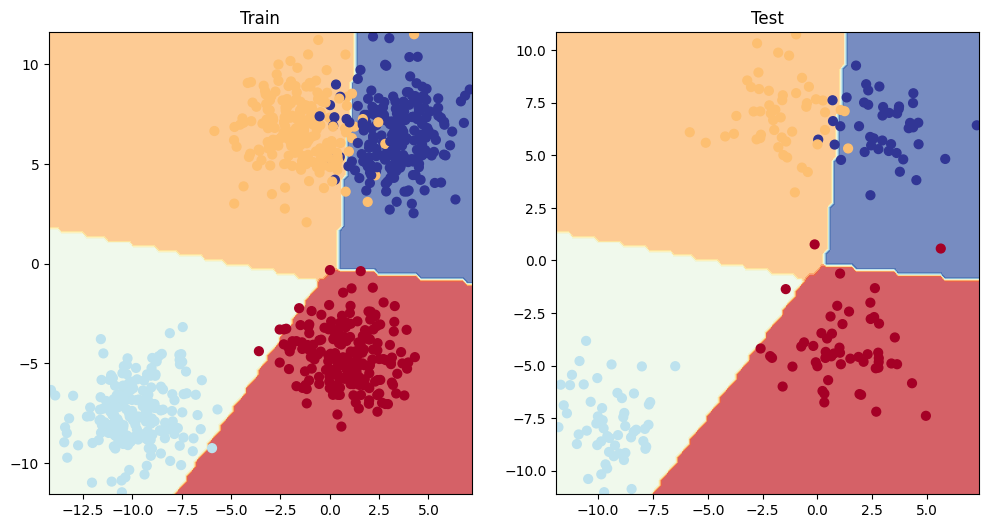

In [185]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_blob_test, y_blob_test)

## 5-2. Depth & Breadth
Deeper models require more training & FLOPs (Floating-Point Operations per Second).

In [1]:
# Import dataset (comes with `seaborn`)
import seaborn as sns

iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


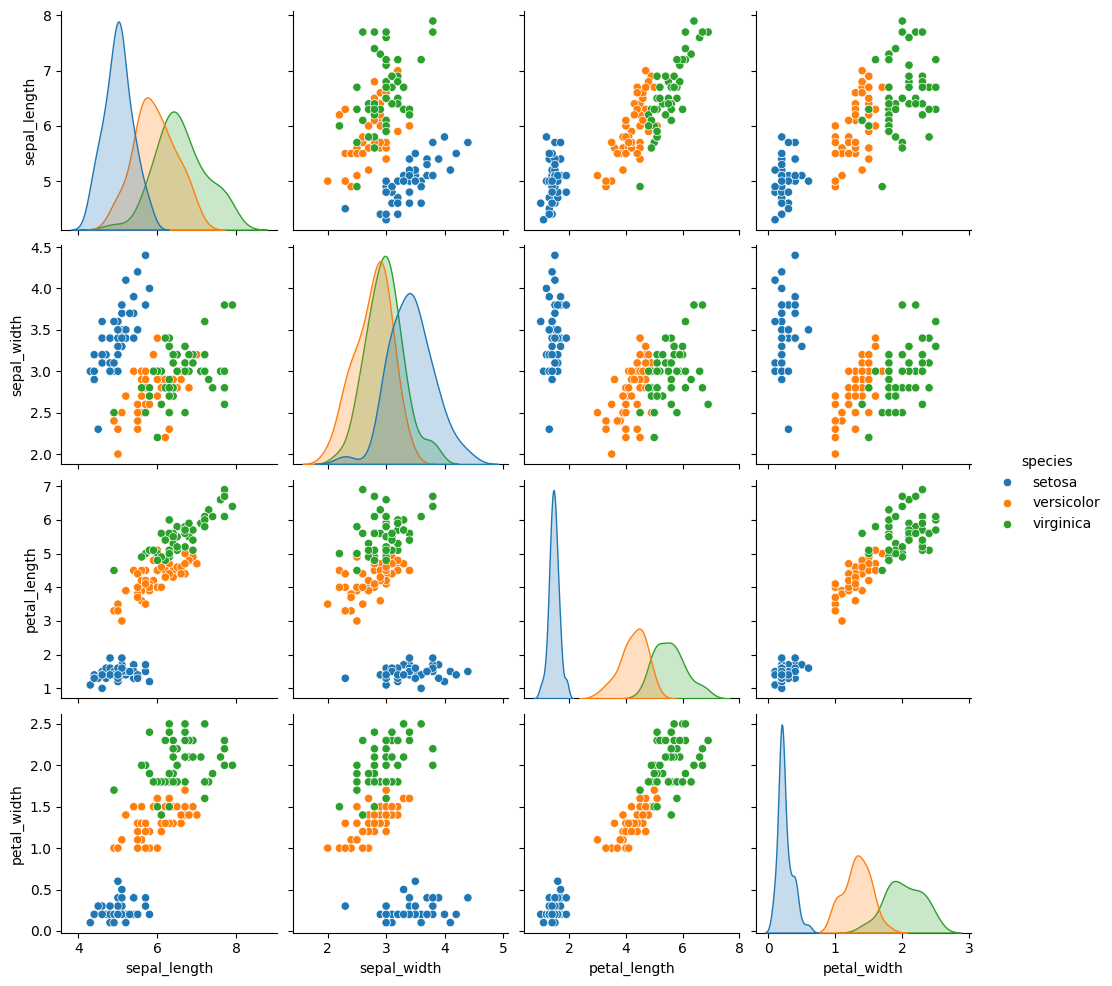

In [4]:
# Plots for inspecting the data
import matplotlib.pyplot as plt

sns.pairplot(iris, hue='species')
plt.show()

In [6]:
import torch

# Convert from pandas DataFrame to PyTorch tensor
data = torch.tensor(iris[iris.columns[0:4]].values).float()

# Transform species to number
labels = torch.zeros(len(data), dtype=torch.long)
# labels[iris.species=='setosa'] = 0
labels[iris.species=='versicolor'] = 1
labels[iris.species=='virginica'] = 2

print(labels)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])


In [7]:
# Model architecture
iris_model = torch.nn.Sequential(
    torch.nn.Linear(4, 64),
    torch.nn.ReLU(),
    torch.nn.Linear(64, 64),
    torch.nn.ReLU(),
    torch.nn.Linear(64, 3)
)

# Loss function
loss_fn = torch.nn.CrossEntropyLoss()

# Optimizer
optimizer = torch.optim.SGD(iris_model.parameters(), lr=0.01)

print(iris_model)

Sequential(
  (0): Linear(in_features=4, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=3, bias=True)
)


Final Accuracy: 98%


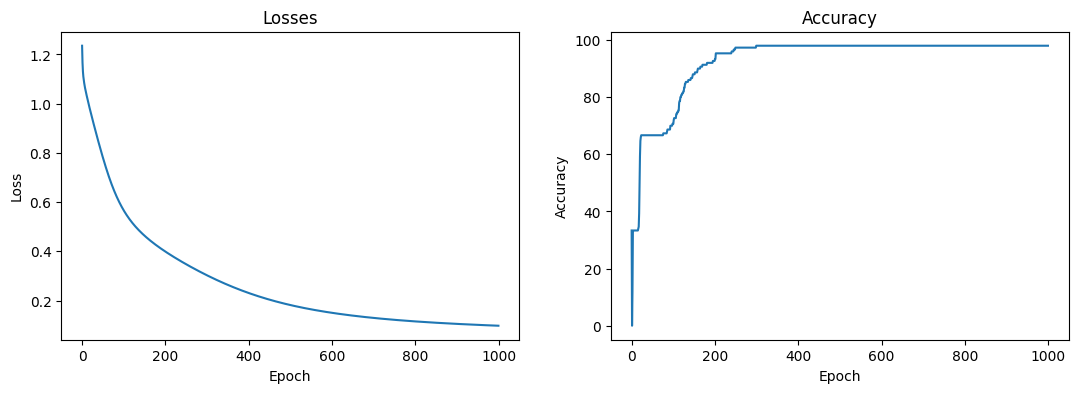

In [8]:
num_epochs = 1000

# Initialize losses
losses = torch.zeros(num_epochs)
ongoing_accuracy = []

# Loop over epochs
for epoch in range(num_epochs):
    # Forward pass
    y_hat = iris_model(data)

    # Compute loss
    loss = loss_fn(y_hat, labels)
    losses[epoch] = loss

    # Back propagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Compute accuracy
    # Boolean (`True` or `False`)
    matches = torch.argmax(y_hat, axis=1) == labels
    # Number (`0` or `1`)
    matches_numeric = matches.float()
    # Average & * 100
    accuracy_percentage = 100 * torch.mean(matches_numeric)
    # Add to list of accuracies
    ongoing_accuracy.append(accuracy_percentage)

# Make predictions
predictions = iris_model(data)

predicted_labels = torch.argmax(predictions, axis=1)
total_accuracy = 100 * torch.mean((predicted_labels == labels).float())

# Report accuracy
print('Final Accuracy: %g%%' % total_accuracy)

fig, ax = plt.subplots(1, 2, figsize=(13, 4))

ax[0].plot(losses.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_title('Losses')

ax[1].plot(ongoing_accuracy)
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_title('Accuracy')

plt.show()

In [9]:
torch.argmax(y_hat, axis=1)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
        2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

In [10]:
# Confirm that all model predictions sum to `1`, but only when converted to softmax
sm = torch.nn.Softmax(1)
torch.sum(sm(y_hat), axis=1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 

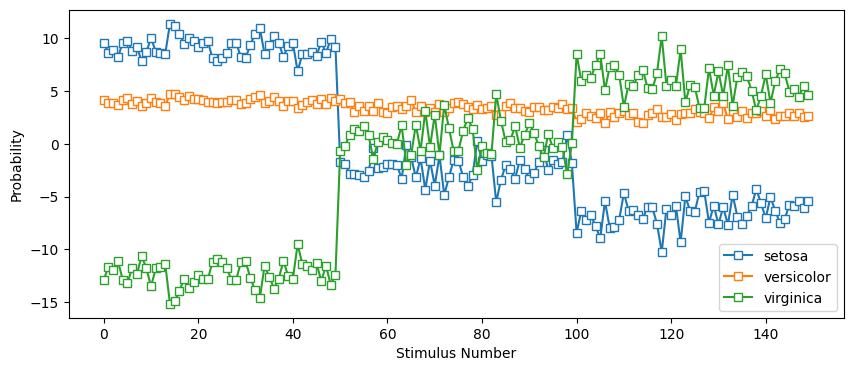

In [11]:
# Plot the raw model outputs
fig = plt.figure(figsize=(10, 4))

plt.plot(y_hat.detach(), 's-', markerfacecolor='w')
plt.xlabel('Stimulus Number')
plt.ylabel('Probability')
plt.legend(['setosa','versicolor','virginica'])
plt.show()

In [12]:
# [1] Experiment with different numbers of hidden units
def create_model(num_hidden_units):
    # Model architecture
    model = torch.nn.Sequential(
        torch.nn.Linear(4, num_hidden_units),
        torch.nn.ReLU(),
        torch.nn.Linear(num_hidden_units, num_hidden_units),
        torch.nn.ReLU(),
        torch.nn.Linear(num_hidden_units, 3),
        # torch.nn.Softmax(dim=1)
    )

    # Loss function
    loss_fn = torch.nn.CrossEntropyLoss()

    # Optimizer
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

    return model, loss_fn, optimizer

def train(model):
    # Initialize losses
    losses = torch.zeros(num_epochs)
    ongoing_accuracy = []

    # Loop over epochs
    for epoch in range(num_epochs):

        # Forward pass
        y_hat = model(data)

        # Compute loss
        loss = loss_fn(y_hat, labels)
        losses[epoch] = loss

        # Back propagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Make predictions
    predictions = model(data)

    predicted_labels = torch.argmax(predictions, axis=1)
    return 100 * torch.mean((predicted_labels==labels).float())

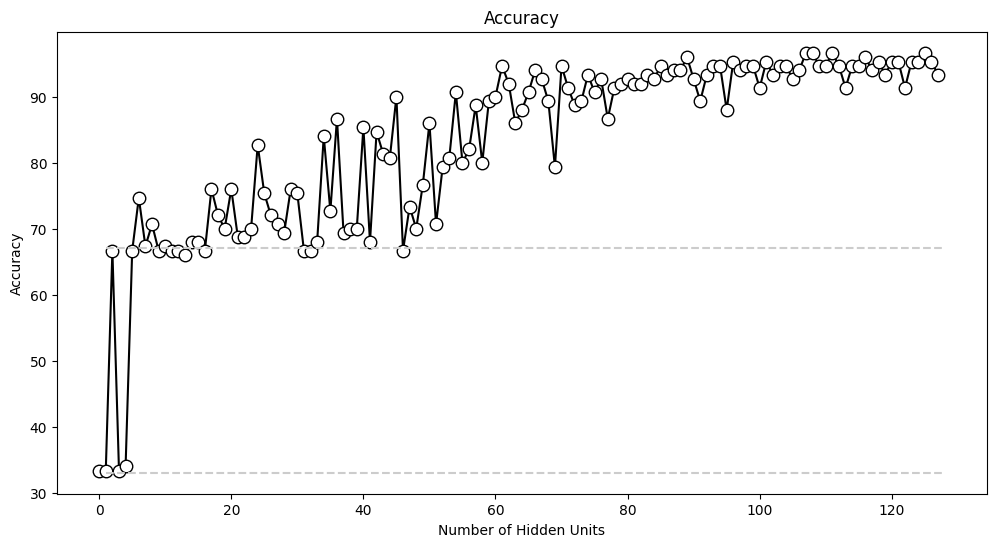

In [18]:
num_epochs  = 150
num_hidden_units_range = np.arange(1, 129)
accuracies = []

for num_hidden_units in num_hidden_units_range:
    # Create a fresh model instance
    model, loss_fn, optimizer = create_model(num_hidden_units)

    # Run the model
    accuracy = train(model)
    accuracies.append(accuracy)

# Report accuracy
fig, ax = plt.subplots(1, figsize=(12, 6))

ax.plot(accuracies, 'ko-', markerfacecolor='w', markersize=9)
ax.plot(num_hidden_units_range[[0, -1]], [33, 33], '--', color=[0.8, 0.8, 0.8])
ax.plot(num_hidden_units_range[[0, -1]], [67, 67], '--', color=[0.8, 0.8, 0.8])
ax.set_ylabel('Accuracy')
ax.set_xlabel('Number of Hidden Units')
ax.set_title('Accuracy')

# print(num_hidden_units_range[[0, -1]])
# [  1 128]

plt.show()

In [20]:
# [2] Build two models for comparing depth & breadth
wide_net = torch.nn.Sequential(
    torch.nn.Linear(2, 4),
    torch.nn.Linear(4, 3),
)

deep_net = torch.nn.Sequential(
    torch.nn.Linear(2, 2),
    torch.nn.Linear(2, 2),
    torch.nn.Linear(2, 3),
)

# Print them out to have a look
print(wide_net)
print(' ')
print(deep_net)

Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): Linear(in_features=4, out_features=3, bias=True)
)
 
Sequential(
  (0): Linear(in_features=2, out_features=2, bias=True)
  (1): Linear(in_features=2, out_features=2, bias=True)
  (2): Linear(in_features=2, out_features=3, bias=True)
)


In [22]:
# check out the parameters of the wide network
for param in wide_net.named_parameters():
    print(param)
    print(' ')

('0.weight', Parameter containing:
tensor([[ 0.1230,  0.6675],
        [ 0.3668, -0.5467],
        [-0.3387, -0.6241],
        [ 0.6614,  0.7030]], requires_grad=True))
 
('0.bias', Parameter containing:
tensor([ 0.3660,  0.6812, -0.1459,  0.0356], requires_grad=True))
 
('1.weight', Parameter containing:
tensor([[ 0.0562, -0.1682, -0.4965,  0.3977],
        [ 0.0134, -0.1176,  0.2053, -0.1508],
        [-0.2007, -0.0110,  0.0563,  0.3568]], requires_grad=True))
 
('1.bias', Parameter containing:
tensor([-0.4426,  0.1647,  0.2879], requires_grad=True))
 


In [21]:
# check out the parameters of the deep network
for param in deep_net.named_parameters():
    print(param)
    print(' ')

('0.weight', Parameter containing:
tensor([[-0.2060, -0.4037],
        [ 0.2873,  0.3178]], requires_grad=True))
 
('0.bias', Parameter containing:
tensor([-0.2860,  0.3452], requires_grad=True))
 
('1.weight', Parameter containing:
tensor([[0.6272, 0.6955],
        [0.1381, 0.6252]], requires_grad=True))
 
('1.bias', Parameter containing:
tensor([-0.6811,  0.5836], requires_grad=True))
 
('2.weight', Parameter containing:
tensor([[-0.1699,  0.6142],
        [ 0.1011,  0.6315],
        [-0.1290, -0.5631]], requires_grad=True))
 
('2.bias', Parameter containing:
tensor([-0.1164, -0.3691, -0.3504], requires_grad=True))
 


In [25]:
# Count the number of nodes (= the number of biases)
# `named_parameters()` is an iterable that returns the tuple `(name, numbers)`
num_nodes_in_wide_net = 0
for param in wide_net.named_parameters():
    if 'bias' in param[0]:
        num_nodes_in_wide_net += len(param[1])

num_nodes_in_deep_net = 0
for param_name, param_tensor in deep_net.named_parameters():
    if 'bias' in param_name:
        num_nodes_in_deep_net += len(param_tensor)

print('There are %s nodes in the wide network.' % num_nodes_in_wide_net)
print('There are %s nodes in the deep network.' % num_nodes_in_deep_net)

There are 7 nodes in the wide network.
There are 7 nodes in the deep network.


In [31]:
# Count the total number of trainable parameters
num_params = 0
for param in wide_net.parameters():
    if param.requires_grad:
        print('This piece has %s parameters.' % param.numel())
        num_params += param.numel()

print('\nTotal of %s parameters.' % num_params)

This piece has 8 parameters.
This piece has 4 parameters.
This piece has 12 parameters.
This piece has 3 parameters.

Total of 27 parameters.


In [30]:
# Use list comprehension

num_params = np.sum([param.numel() for param in wide_net.parameters() if param.requires_grad])
print('Wide net has %s parameters.' % num_params)

num_params = np.sum([param.numel() for param in deep_net.parameters() if param.requires_grad])
print('Deep net has %s parameters.' % num_params)

Wide net has 27 parameters.
Deep net has 21 parameters.


In [36]:
# `torchinfo`
from torchinfo import summary

summary(wide_net, input_size=(1, 2))

Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [1, 3]                    --
├─Linear: 1-1                            [1, 4]                    12
├─Linear: 1-2                            [1, 3]                    15
Total params: 27
Trainable params: 27
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [40]:
class IrisModel(torch.nn.Module):
    def __init__(self, num_hidden_units, num_hidden_layers):
        super().__init__()

        # Create dictionary to store the layers
        self.layers = torch.nn.ModuleDict()
        self.num_hidden_layers = num_hidden_layers

        # Input layer
        self.layers['input'] = torch.nn.Linear(4, num_hidden_units)
    
        # Hidden layers
        for i in range(num_hidden_layers):
            self.layers[f'hidden{i}'] = torch.nn.Linear(num_hidden_units, num_hidden_units)
    
        # Output layer
        self.layers['output'] = torch.nn.Linear(num_hidden_units, 3)

    # Forward pass
    def forward(self, x):
        # Input layer

        # `F.relu()` or `torch.nn.functional.relu()` is a function; `torch.nn.ReLU` is a class that simply calls `F.relu()`
        x = torch.nn.functional.relu(self.layers['input'](x))
    
        # Hidden layers
        for i in range(self.num_hidden_layers):
            x = torch.nn.functional.relu(self.layers[f'hidden{i}'](x))
    
        # Output layer
        x = self.layers['output'](x)
        return x

# Generate an instance of the model and inspect it
num_hidden_units = 12
num_hidden_layers = 4
model = IrisModel(num_hidden_units, num_hidden_layers)
print(model)

IrisModel(
  (layers): ModuleDict(
    (input): Linear(in_features=4, out_features=12, bias=True)
    (hidden0): Linear(in_features=12, out_features=12, bias=True)
    (hidden1): Linear(in_features=12, out_features=12, bias=True)
    (hidden2): Linear(in_features=12, out_features=12, bias=True)
    (hidden3): Linear(in_features=12, out_features=12, bias=True)
    (output): Linear(in_features=12, out_features=3, bias=True)
  )
)


In [43]:
# Test the function
torch.manual_seed(0)
test_x = torch.randn(10, 4)

# Run it through the deep neural network
test_y = model(test_x)

# Exam the shape of the output
print(test_y.shape)
print(' ')
print(test_y)

torch.Size([10, 3])
 
tensor([[ 0.1902, -0.2040,  0.2785],
        [ 0.1907, -0.2024,  0.2749],
        [ 0.1900, -0.2035,  0.2793],
        [ 0.1891, -0.2029,  0.2803],
        [ 0.1896, -0.2033,  0.2802],
        [ 0.1890, -0.2032,  0.2806],
        [ 0.1898, -0.2040,  0.2791],
        [ 0.1892, -0.2036,  0.2798],
        [ 0.1893, -0.2035,  0.2758],
        [ 0.1887, -0.2038,  0.2782]], grad_fn=<AddmmBackward0>)


In [47]:
def train(model):
    # Define the loss function and optimizer
    loss_fn = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

    # Loop over epochs
    for epoch in range(num_epochs):
        # Forward pass
        y_hat = model(data)
    
        # Compute loss
        loss = loss_fn(y_hat, labels)
    
        # Back propagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Final forward pass to get accuracy
    predictions = model(data)
    predicted_labels = torch.argmax(predictions, axis=1)
    accuracy = 100 * torch.mean((predicted_labels == labels).float())

    # Total number of trainable parameters in the model
    num_params = sum(param.numel() for param in model.parameters() if param.requires_grad)

    # Function outputs
    return accuracy, num_params

In [48]:
# Test the function
num_epochs = 2500
accuracy = train(model)

# Check the outputs
print(accuracy)

(tensor(98.6667), 723)


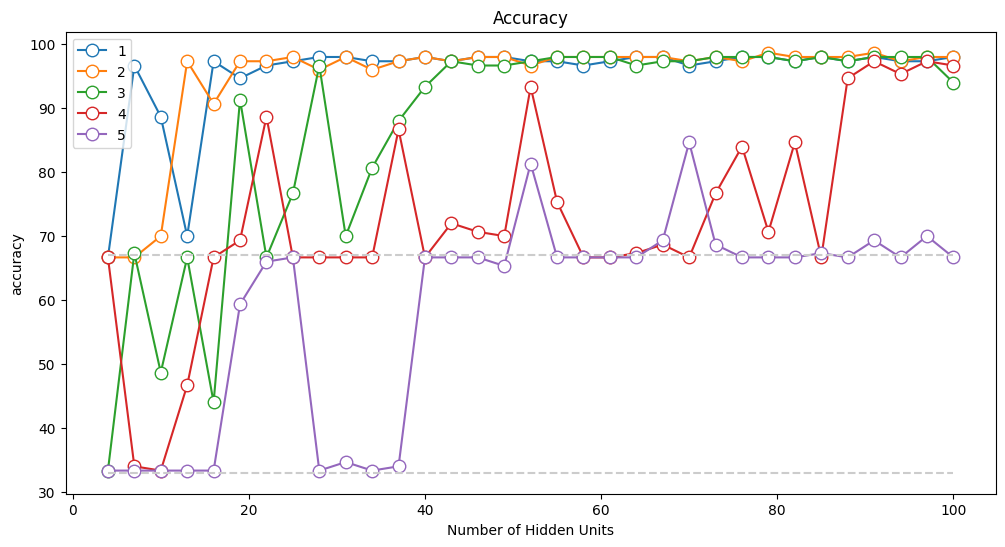

In [49]:
# Define the model parameters
num_hidden_layers_range = range(1, 6)
num_hidden_units_range = np.arange(4, 101, 3)

# initialize output matrices
accuracies = np.zeros((len(num_hidden_units_range), len(num_hidden_layers_range)))
total_params = np.zeros((len(num_hidden_units_range), len(num_hidden_layers_range)))

# Number of training epochs
num_epochs = 500

# Start the experiment
for num_hidden_units_idx in range(len(num_hidden_units_range)):
    for num_hidden_layers_idx in range(len(num_hidden_layers_range)):

        # Create a fresh model instance
        model = IrisModel(num_hidden_units_range[num_hidden_units_idx], num_hidden_layers_range[num_hidden_layers_idx])
    
        # Run the model and store the results
        accuracy, num_params = train(model)
        accuracies[num_hidden_units_idx, num_hidden_layers_idx] = accuracy
    
        # Store the total number of parameters in the model
        total_params[num_hidden_units_idx, num_hidden_layers_idx] = num_params

# Show accuracy as a function of model depth
fig, ax = plt.subplots(1, figsize=(12, 6))

ax.plot(num_hidden_units_range, accuracies, 'o-', markerfacecolor='w', markersize=9)
ax.plot(num_hidden_units_range[[0, -1]], [33, 33], '--', color=[0.8, 0.8, 0.8])
ax.plot(num_hidden_units_range[[0, -1]], [67, 67], '--', color=[0.8, 0.8, 0.8])
ax.legend(num_hidden_layers_range)
ax.set_ylabel('accuracy')
ax.set_xlabel('Number of Hidden Units')
ax.set_title('Accuracy')
plt.show()

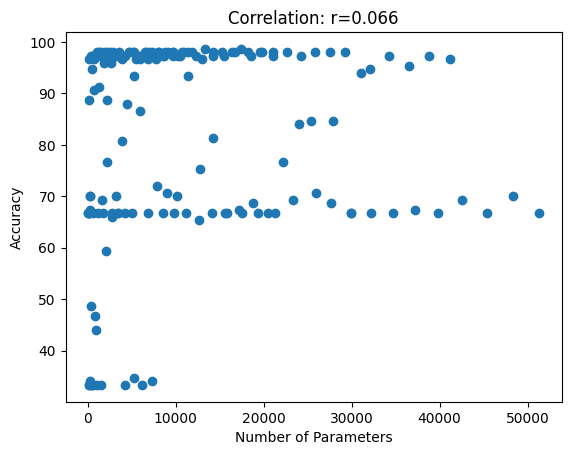

In [50]:
import numpy as np

# Vectorize for convenience
X = total_params.flatten()
y = accuracies.flatten()

# Correlation between them
r = np.corrcoef(X, y)[0, 1]

# Scatter plot
plt.plot(X, y,'o')
plt.xlabel('Number of Parameters')
plt.ylabel('Accuracy')
plt.title('Correlation: r=' + str(np.round(r, 3)))
plt.show()

# 6. Regularization
## 6-1. Dropout

In [ ]:
# [1] Dropout in PyTorch
# define a dropout instance and make some data
prob = .5

dropout = nn.Dropout(p=prob)
x = torch.ones(10)

# let's see what dropout returns
y = dropout(x)
print(x)
print(y*(1-prob))
print(torch.mean(y))

In [ ]:
# dropout is turned off when evaluating the model
dropout.eval()
y = dropout(x)
print(y)
print(torch.mean(y))

In [ ]:
# annoyingly, F.dropout() is not deactivated in eval mode:

dropout.eval()
y = F.dropout(x)
print(y)
print(torch.mean(y))

In [ ]:
# but you can manually switch it off
# dropout.eval()
y = F.dropout(x,training=False)

print(y)
print(torch.mean(y))

In [ ]:
# the model needs to be reset after toggling into eval mode

dropout.train()
y = dropout(x)
print(y) # with dropout


dropout.eval()
y = dropout(x)
print(y) # without dropout


# dropout.train()
y = dropout(x)
print(y) # still w/o dropout ;)

In [ ]:
# [2] Dropout in practice
# create data

nPerClust = 200

th = np.linspace(0,4*np.pi,nPerClust)
r1 = 10
r2 = 15

# generate data
a = [ r1*np.cos(th) + np.random.randn(nPerClust)*3 ,
      r1*np.sin(th) + np.random.randn(nPerClust) ]
b = [ r2*np.cos(th) + np.random.randn(nPerClust) ,
      r2*np.sin(th) + np.random.randn(nPerClust)*3 ]

# true labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

# concatanate into a matrix
data_np = np.hstack((a,b)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title("The qwerties' doughnuts!")
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [ ]:
# use scikitlearn to split the data
train_data,test_data, train_labels,test_labels = train_test_split(data, labels, test_size=.2)


# then convert them into PyTorch Datasets (note: already converted to tensors)
train_data = TensorDataset(train_data,train_labels)
test_data  = TensorDataset(test_data,test_labels)


# finally, translate into dataloader objects
batchsize    = 16 #int(train_data.tensors[0].shape[0]/4) -- Hard-coding is better to avoid huge batches!
train_loader = DataLoader(train_data,batch_size=batchsize,shuffle=True)
test_loader  = DataLoader(test_data,batch_size=test_data.tensors[0].shape[0]) # how big should these batches be??

In [ ]:
class theModelClass(nn.Module):
  def __init__(self,dropoutRate):
    super().__init__()

    ### layers
    self.input  = nn.Linear(  2,128)
    self.hidden = nn.Linear(128,128)
    self.output = nn.Linear(128, 1)

    # parameters
    self.dr = dropoutRate

  # forward pass
  def forward(self,x):

    # pass the data through the input layer
    x = F.relu( self.input(x) )

    # dropout after input layer
    x = F.dropout(x,p=self.dr,training=self.training) # training=self.training means to turn off during eval mode
    
    # pass the data through the hidden layer
    x = F.relu( self.hidden(x) )

    # dropout after hidden layer
    x = F.dropout(x,p=self.dr,training=self.training) # training=self.training means to turn off during eval mode
    
    # output layer
    x = self.output(x)
    # no dropout here!!
    return x

# test the model
tmpnet = theModelClass(.25)

# run some random data through
tmpdata = torch.randn((10,2))
yhat = tmpnet(tmpdata)
yhat

In [ ]:
def createANewModel(dropoutrate):

  # grab an instance of the model class
  ANNQC = theModelClass(dropoutrate)

  # loss function
  lossfun = nn.BCEWithLogitsLoss()

  # optimizer
  optimizer = torch.optim.SGD(ANNQC.parameters(),lr=.002)

  return ANNQC,lossfun,optimizer

# train the model

# training parameter
numepochs = 1000

# NOTE: this time, the model, lossfun, and optimizer are inputs into the function!
def trainTheModel(ANNQC,lossfun,optimizer):

  # initialize accuracies as empties (not storing losses here)
  trainAcc = []
  testAcc  = []


  # loop over epochs
  for epochi in range(numepochs):

    # switch training mode on (is this the right place for this code??)
    ANNQC.train() 

    # loop over training data batches
    batchAcc = []
    for X,y in train_loader:

      # forward pass and loss
      yHat = ANNQC(X)
      loss = lossfun(yHat,y)
      
      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # compute training accuracy just for this batch
      batchAcc.append( 100*torch.mean(((yHat>0)==y).float()).item() )
    # end of batch loop...

    # now that we've trained through the batches, get their average training accuracy
    trainAcc.append( np.mean(batchAcc) )

    # test accuracy
    ANNQC.eval() # switch training off
    X,y = next(iter(test_loader)) # extract X,y from test dataloader
    yHat = ANNQC(X)
    testAcc.append( 100*torch.mean(((yHat>0)==y).float()).item() )
  
  # function output
  return trainAcc,testAcc

In [ ]:
# create a model
dropoutrate = .0
ANNQC,lossfun,optimizer = createANewModel(dropoutrate)

# train the model (note the inputs!)
trainAcc,testAcc = trainTheModel(ANNQC,lossfun,optimizer)

In [ ]:
# create a 1D smoothing filter
def smooth(x,k=5):
  return np.convolve(x,np.ones(k)/k,mode='same')

# plot the results
fig = plt.figure(figsize=(10,5))

plt.plot(smooth(trainAcc),'bs-')
plt.plot(smooth(testAcc),'ro-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend(['Train','Test'])
plt.title('Dropout rate = %g'%dropoutrate)

plt.show()

In [ ]:
# run an experiment (note: takes ~3.5 mins)

dropoutRates = np.arange(10)/10
results = np.zeros((len(dropoutRates),2))

for di in range(len(dropoutRates)):

  # create and train the model
  ANNQC,lossfun,optimizer = createANewModel(dropoutRates[di])
  trainAcc,testAcc = trainTheModel(ANNQC,lossfun,optimizer)

  # store accuracies from last 100 epochs
  results[di,0] = np.mean(trainAcc[-100:])
  results[di,1] = np.mean(testAcc[-100:])

In [ ]:
# plot the experiment results
fig,ax = plt.subplots(1,2,figsize=(15,5))

ax[0].plot(dropoutRates,results,'o-')
ax[0].set_xlabel('Dropout proportion')
ax[0].set_ylabel('Average accuracy')
ax[0].legend(['Train','Test'])

ax[1].plot(dropoutRates,-np.diff(results,axis=1),'o-')
ax[1].plot([0,.9],[0,0],'k--')
ax[1].set_xlabel('Dropout proportion')
ax[1].set_ylabel('Train-test difference (acc%)')

plt.show()

In [ ]:
# [3] Dropout on Iris dataset
# import dataset
import pandas as pd
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

# convert from pandas dataframe to tensor
data = torch.tensor( iris[iris.columns[0:4]].values ).float()

# transform species to number
labels = torch.zeros(len(data), dtype=torch.long)
# labels[iris.species=='setosa'] = 0 # don't need!
labels[iris.species=='versicolor'] = 1
labels[iris.species=='virginica'] = 2

In [ ]:
# use scikitlearn to split the data
train_data,test_data, train_labels,test_labels = train_test_split(data, labels, test_size=.2)


# then convert them into PyTorch Datasets (note: already converted to tensors)
train_data = torch.utils.data.TensorDataset(train_data,train_labels)
test_data  = torch.utils.data.TensorDataset(test_data,test_labels)


# finally, translate into dataloader objects
batchsize    = 16
train_loader = DataLoader(train_data,batch_size=batchsize,shuffle=True)
test_loader  = DataLoader(test_data,batch_size=test_data.tensors[0].shape[0]) # how big should these batches be??

In [ ]:
class theModelClass(nn.Module):
  def __init__(self,dropoutRate):
    super().__init__()

    ### layers
    self.input  = nn.Linear( 4,12)
    self.hidden = nn.Linear(12,12)
    self.output = nn.Linear(12, 3)

    # parameters
    self.dr = dropoutRate

  # forward pass
  def forward(self,x):

    # input
    x = F.relu( self.input(x) )
    x = F.dropout(x,p=self.dr,training=self.training) # switch dropout off during .eval()

    # hidden
    x = F.relu( self.hidden(x) )
    x = F.dropout(x,p=self.dr,training=self.training)

    # output
    x = self.output(x)
    return x

# test the model
tmpnet = theModelClass(.25)

# run some random data through
tmpdata = torch.randn((10,4))
yhat = tmpnet(tmpdata)
yhat

In [ ]:
# a function that creates the ANN model

def createANewModel(dropoutrate):

  # grab an instance of the model class
  ANNiris = theModelClass(dropoutrate)

  # loss function
  lossfun = nn.CrossEntropyLoss()

  # optimizer
  optimizer = torch.optim.SGD(ANNiris.parameters(),lr=.005)

  return ANNiris,lossfun,optimizer

# train the model

# global parameter
numepochs = 500

def trainTheModel():

  # initialize accuracies as empties (not storing losses here)
  trainAcc = []
  testAcc  = []

  # loop over epochs
  for epochi in range(numepochs):

    # switch learning on
    ANNiris.train()

    # loop over training data batches
    batchAcc = []
    for X,y in train_loader:

      # forward pass and loss
      yHat = ANNiris(X)
      loss = lossfun(yHat,y)

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # compute training accuracy just for this batch
      batchAcc.append( 100*torch.mean((torch.argmax(yHat,axis=1) == y).float()).item() )
    # end of batch loop...

    # now that we've trained through the batches, get their average training accuracy
    trainAcc.append( np.mean(batchAcc) )

    # test accuracy
    ANNiris.eval()
    X,y = next(iter(test_loader)) # extract X,y from test dataloader
    predlabels = torch.argmax( ANNiris(X),axis=1 )
    testAcc.append( 100*torch.mean((predlabels == y).float()).item() )

  # function output
  return trainAcc,testAcc

In [ ]:
# create a model
dropoutrate = .0
ANNiris,lossfun,optimizer = createANewModel(dropoutrate)

# train the model
trainAcc,testAcc = trainTheModel()

In [ ]:
# plot the results
fig = plt.figure(figsize=(10,5))

plt.plot(trainAcc,'bs-')
plt.plot(testAcc,'ro-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend(['Train','Test'])
plt.title('Dropout rate = %g'%dropoutrate)

plt.show()

In [ ]:
# run an experiment

dropoutRates = np.arange(10)/10
results = np.zeros((len(dropoutRates),2))

for di in range(len(dropoutRates)):

  # create and train the model
  ANNiris,lossfun,optimizer = createANewModel(dropoutRates[di])
  trainAcc,testAcc = trainTheModel()

  # store accuracies
  results[di,0] = np.mean(trainAcc[-50:])
  results[di,1] = np.mean(testAcc[-50:])

In [ ]:
# plot the experiment results
fig,ax = plt.subplots(1,2,figsize=(15,5))

ax[0].plot(dropoutRates,results,'o-')
ax[0].set_xlabel('Dropout proportion')
ax[0].set_ylabel('Average accuracy')
ax[0].legend(['Train','Test'])

ax[1].plot(dropoutRates,-np.diff(results,axis=1),'o-')
ax[1].plot([0,.9],[0,0],'k--')
ax[1].set_xlabel('Dropout proportion')
ax[1].set_ylabel('Train-test difference (acc%)')

plt.show()

## 6-2. L1 Regularization

In [ ]:
# a function that creates the ANN model

def createANewModel():

  # model architecture
  ANNiris = nn.Sequential(
      nn.Linear(4,64),   # input layer
      nn.ReLU(),         # activation unit
      nn.Linear(64,64),  # hidden layer
      nn.ReLU(),         # activation unit
      nn.Linear(64,3),   # output units
        )

  # loss function
  lossfun = nn.CrossEntropyLoss()

  # optimizer
  optimizer = torch.optim.SGD(ANNiris.parameters(),lr=.005)

  return ANNiris,lossfun,optimizer

In [ ]:
# explore the model in more detail
tmpmodel = createANewModel()[0]

# print the model architecture
print(tmpmodel)

# print the model's parameters
for i in tmpmodel.named_parameters():
  print(i[0],i[1].shape,i[1].numel())

In [ ]:
# train the model

# global parameter
numepochs = 1000

def trainTheModel(L1lambda):

  # initialize accuracies as empties
  trainAcc = []
  testAcc  = []
  losses   = []

  # count the total number of weights in the model
  nweights = 0
  for pname,weight in ANNiris.named_parameters():
    if 'bias' not in pname:
      nweights = nweights + weight.numel()


  # loop over epochs
  for epochi in range(numepochs):

    # loop over training data batches
    batchAcc  = []
    batchLoss = []
    for X,y in train_loader:

      # forward pass and loss
      yHat = ANNiris(X)
      loss = lossfun(yHat,y)



      ### add L1 term
      L1_term = torch.tensor(0.,requires_grad=True)

      # sum up all abs(weights)
      for pname,weight in ANNiris.named_parameters():
        if 'bias' not in pname:
           L1_term = L1_term + torch.sum(torch.abs(weight))

      # add to loss term
      loss = loss + L1lambda*L1_term/nweights



      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # compute training accuracy just for this batch
      batchAcc.append( 100*torch.mean((torch.argmax(yHat,axis=1) == y).float()).item() )
      batchLoss.append( loss.item() )
    # end of batch loop...

    # now that we've trained through the batches, get their average training accuracy
    trainAcc.append( np.mean(batchAcc) )
    losses.append( np.mean(batchLoss) )

    # test accuracy
    X,y = next(iter(test_loader)) # extract X,y from test dataloader
    predlabels = torch.argmax( ANNiris(X),axis=1 )
    testAcc.append( 100*torch.mean((predlabels == y).float()).item() )

  # function output
  return trainAcc,testAcc,losses

In [ ]:
# create a model
ANNiris,lossfun,optimizer = createANewModel()

# train the model
L1lambda = .001
trainAcc,testAcc,losses = trainTheModel(L1lambda)

In [ ]:
# plot the results
fig,ax = plt.subplots(1,2,figsize=(15,5))


ax[0].plot(losses,'k^-')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_title('Losses with L1 $\lambda$=' + str(L1lambda))

ax[1].plot(trainAcc,'ro-')
ax[1].plot(testAcc,'bs-')
ax[1].set_title('Accuracy with L1 $\lambda$=' + str(L1lambda))
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy (%)')
ax[1].legend(['Train','Test'])

plt.show()

In [ ]:
# create a 1D smoothing filter
def smooth(x,k):
  return np.convolve(x,np.ones(k)/k,mode='same')

In [ ]:
# range of L1 regularization amounts
L1lambda = np.linspace(0,.005,10)

# initialize output results matrices
accuracyResultsTrain = np.zeros((numepochs,len(L1lambda)))
accuracyResultsTest  = np.zeros((numepochs,len(L1lambda)))


# loop over batch sizes
for li in range(len(L1lambda)):

  # create and train a model
  ANNiris,lossfun,optimizer = createANewModel()
  trainAcc,testAcc,losses = trainTheModel(L1lambda[li])

  # store data
  accuracyResultsTrain[:,li] = smooth(trainAcc,10)
  accuracyResultsTest[:,li]  = smooth(testAcc,10)

In [ ]:
# plot some results
fig,ax = plt.subplots(1,2,figsize=(17,7))

ax[0].plot(accuracyResultsTrain)
ax[0].set_title('Train accuracy')
ax[1].plot(accuracyResultsTest)
ax[1].set_title('Test accuracy')

# make the legend easier to read
leglabels = [np.round(i,4) for i in L1lambda]

# common features
for i in range(2):
  ax[i].legend(leglabels)
  ax[i].set_xlabel('Epoch')
  ax[i].set_ylabel('Accuracy (%)')
  ax[i].set_ylim([50,101])
  ax[i].grid()

plt.show()

In [ ]:
# show average accuracy by L1 rate

# average only some epochs
epoch_range = [500,950]


plt.plot(L1lambda,
         np.mean(accuracyResultsTrain[epoch_range[0]:epoch_range[1],:],axis=0),
         'bo-',label='TRAIN')

plt.plot(L1lambda,
         np.mean(accuracyResultsTest[epoch_range[0]:epoch_range[1],:],axis=0),
         'rs-',label='TEST')

plt.xlabel('L1 regularization amount')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 6-3. L2 Regularization

In [ ]:
# a function that creates the ANN model

def createANewModel(L2lambda):

  # model architecture
  ANNiris = nn.Sequential(
      nn.Linear(4,64),   # input layer
      nn.ReLU(),         # activation unit
      nn.Linear(64,64),  # hidden layer
      nn.ReLU(),         # activation unit
      nn.Linear(64,3),   # output units
        )

  # loss function
  lossfun = nn.CrossEntropyLoss()

  # optimizer
  optimizer = torch.optim.SGD(ANNiris.parameters(),lr=.005,weight_decay=L2lambda)

  return ANNiris,lossfun,optimizer

In [ ]:
# train the model

# global parameter
numepochs = 1000

def trainTheModel():

  # initialize accuracies as empties
  trainAcc = []
  testAcc  = []
  losses   = []

  # loop over epochs
  for epochi in range(numepochs):

    # need to toggle train mode here??

    # loop over training data batches
    batchAcc  = []
    batchLoss = []
    for X,y in train_loader:

      # forward pass and loss
      yHat = ANNiris(X)
      loss = lossfun(yHat,y)

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # compute training accuracy just for this batch
      batchAcc.append( 100*torch.mean((torch.argmax(yHat,axis=1) == y).float()).item() )
      batchLoss.append( loss.item() )
    # end of batch loop...

    # now that we've trained through the batches, get their average training accuracy
    trainAcc.append( np.mean(batchAcc) )
    losses.append( np.mean(batchLoss) )

    # test accuracy
    ANNiris.eval()
    X,y = next(iter(test_loader)) # extract X,y from test dataloader
    predlabels = torch.argmax( ANNiris(X),axis=1 )
    testAcc.append( 100*torch.mean((predlabels == y).float()).item() )

    # no worries, reset here ;)
    ANNiris.train()

  # function output
  return trainAcc,testAcc,losses

In [ ]:
# create a model
L2lambda = .01
ANNiris,lossfun,optimizer = createANewModel(L2lambda)

# train the model
trainAcc,testAcc,losses = trainTheModel()

In [ ]:
# plot the results
fig,ax = plt.subplots(1,2,figsize=(15,5))


ax[0].plot(losses,'k^-')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_title('Losses with L2 $\lambda$=' + str(L2lambda))

ax[1].plot(trainAcc,'ro-')
ax[1].plot(testAcc,'bs-')
ax[1].set_title('Accuracy with L2 $\lambda$=' + str(L2lambda))
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy (%)')
ax[1].legend(['Train','Test'])

plt.show()

In [ ]:
# create a 1D smoothing filter
def smooth(x,k):
  return np.convolve(x,np.ones(k)/k,mode='same')

In [ ]:
# range of L2 regularization amounts
l2lambdas = np.linspace(0,.1,10)

# initialize output results matrices
accuracyResultsTrain = np.zeros((numepochs,len(l2lambdas)))
accuracyResultsTest  = np.zeros((numepochs,len(l2lambdas)))


# loop over batch sizes
for li in range(len(l2lambdas)):

  # create and train a model
  ANNiris,lossfun,optimizer = createANewModel(l2lambdas[li])
  trainAcc,testAcc,losses = trainTheModel()

  # store data
  accuracyResultsTrain[:,li] = smooth(trainAcc,10)
  accuracyResultsTest[:,li]  = smooth(testAcc,10)

In [ ]:
# plot some results
fig,ax = plt.subplots(1,2,figsize=(17,7))

ax[0].plot(accuracyResultsTrain)
ax[0].set_title('Train accuracy')
ax[1].plot(accuracyResultsTest)
ax[1].set_title('Test accuracy')

# make the legend easier to read
leglabels = [np.round(i,2) for i in l2lambdas]

# common features
for i in range(2):
  ax[i].legend(leglabels)
  ax[i].set_xlabel('Epoch')
  ax[i].set_ylabel('Accuracy (%)')
  ax[i].set_ylim([50,101])
  ax[i].grid()

plt.show()

In [ ]:
# show average accuracy by L2 rate

# average only some epochs
epoch_range = [500,950]


plt.plot(l2lambdas,
         np.mean(accuracyResultsTrain[epoch_range[0]:epoch_range[1],:],axis=0),
         'bo-',label='TRAIN')

plt.plot(l2lambdas,
         np.mean(accuracyResultsTest[epoch_range[0]:epoch_range[1],:],axis=0),
         'rs-',label='TEST')

plt.xlabel('L2 regularization amount')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 6-4. Early Stopping

# 7. Normalization
## 7-1. Batch Normalization

In [ ]:
# import the data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url,sep=';')
data = data[data['total sulfur dioxide']<200] # drop a few outliers

# z-score all columns except for quality
cols2zscore = data.keys()
cols2zscore = cols2zscore.drop('quality')
data[cols2zscore] = data[cols2zscore].apply(stats.zscore)

# create a new column for binarized (boolean) quality
data['boolQuality'] = 0
# data['boolQuality'][data['quality']<6] = 0 # implicit in the code! just here for clarity
data['boolQuality'][data['quality']>5] = 1

In [ ]:
# convert from pandas dataframe to tensor
dataT  = torch.tensor( data[cols2zscore].values ).float()
labels = torch.tensor( data['boolQuality'].values ).float()
labels = labels[:,None] # transform to matrix

In [ ]:
# use scikitlearn to split the data
train_data,test_data, train_labels,test_labels = train_test_split(dataT, labels, test_size=.1)

# then convert them into PyTorch Datasets (note: already converted to tensors)
train_dataDataset = TensorDataset(train_data,train_labels)
test_dataDataset  = TensorDataset(test_data,test_labels)


# train and test dataloaders
test_loader  = DataLoader(test_dataDataset,batch_size=test_dataDataset.tensors[0].shape[0])
train_loader = DataLoader(train_dataDataset,batch_size=32, shuffle=True, drop_last=True)

In [ ]:
# create a class for the model WITH BATCH NORM

class ANNwine_withBNorm(nn.Module):
  def __init__(self):
    super().__init__()

    ### input layer
    self.input = nn.Linear(11,16)
    
    ### hidden layers
    self.fc1    = nn.Linear(16,32)
    self.bnorm1 = nn.BatchNorm1d(16) # the number of units into this layer
    self.fc2    = nn.Linear(32,20)
    self.bnorm2 = nn.BatchNorm1d(32) # the number of units into this layer

    ### output layer
    self.output = nn.Linear(20,1)
  
  # forward pass
  def forward(self,x,doBN):

    # input (x starts off normalized)
    x = F.relu( self.input(x) )


    if doBN:
      # hidden layer 1
      x = self.bnorm1(x) # batchnorm
      x = self.fc1(x)    # weighted combination
      x = F.relu(x)      # activation function

      # hidden layer 2
      x = self.bnorm2(x) # batchnorm
      x = self.fc2(x)    # weighted combination
      x = F.relu(x)      # activation function
    

    else:
      # hidden layer 1
      x = F.relu( self.fc1(x) )

      # hidden layer 2
      x = F.relu( self.fc2(x) )

    # output layer
    return self.output(x)

In [ ]:
# a function that trains the model

# global parameter
numepochs = 1000

def trainTheModel(doBN=True):

  # loss function and optimizer
  lossfun = nn.BCEWithLogitsLoss()
  optimizer = torch.optim.SGD(winenet.parameters(),lr=.01)

  # initialize losses
  losses   = torch.zeros(numepochs)
  trainAcc = []
  testAcc  = []

  # loop over epochs
  for epochi in range(numepochs):

    # switch on training mode
    winenet.train()

    # loop over training data batches
    batchAcc  = []
    batchLoss = []
    for X,y in train_loader:

      # forward pass and loss
      yHat = winenet(X,doBN)
      loss = lossfun(yHat,y)

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # loss from this batch
      batchLoss.append(loss.item())

      # compute training accuracy for this batch
      batchAcc.append( 100*torch.mean(((yHat>0) == y).float()).item() )
    # end of batch loop...

    # now that we've trained through the batches, get their average training accuracy
    trainAcc.append( np.mean(batchAcc) )

    # and get average losses across the batches
    losses[epochi] = np.mean(batchLoss)



    ### test accuracy
    winenet.eval()
    X,y = next(iter(test_loader)) # extract X,y from test dataloader
    with torch.no_grad(): # deactivates autograd
      yHat = winenet(X,doBN)
    testAcc.append( 100*torch.mean(((yHat>0) == y).float()).item() )
  
  # function output
  return trainAcc,testAcc,losses

In [ ]:
# takes ~2 mins

# create and train a model NO BATCHNORM
winenet = ANNwine_withBNorm()
trainAccNo,testAccNo,lossesNo = trainTheModel(False)

# create and train a model WITH BATCHNORM
winenet = ANNwine_withBNorm()
trainAccWith,testAccWith,lossesWith = trainTheModel(True)

In [ ]:
# plot the results
fig,ax = plt.subplots(1,3,figsize=(17,5))

ax[0].plot(lossesWith,label='WITH batchnorm')
ax[0].plot(lossesNo,label='NO batchnorm')
ax[0].set_title('Losses')
ax[0].legend()

ax[1].plot(trainAccWith,label='WITH batchnorm')
ax[1].plot(trainAccNo,label='NO batchnorm')
ax[1].set_title('Train accuracy')
ax[1].legend()

ax[2].plot(testAccWith,label='WITH batchnorm')
ax[2].plot(testAccNo,label='NO batchnorm')
ax[2].set_title('Test accuracy')
ax[2].legend()

plt.show()

# 10. Model Improvement
- [A Recipe for Training Neural Networks](https://karpathy.github.io/2019/04/25/recipe/)